In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
sns.set_theme(style="darkgrid")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.metrics import roc_auc_score

from bokeh.plotting import figure,show
from bokeh.io import show, output_notebook
from bokeh.models import BoxAnnotation
from bokeh.models import NumeralTickFormatter
from bokeh.io import curdoc
from bokeh.models import HoverTool
from bokeh.layouts import row
from bokeh.plotting import output_file
from bokeh.models import BoxSelectTool, BoxZoomTool, LassoSelectTool
from bokeh.layouts import column
from bokeh.models import Slider

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/00272/SkillCraft1_Dataset.csv')
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019



Attribute Information:

1. GameID: Unique ID number for each game (integer)
2. LeagueIndex: Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues coded 1-8 (Ordinal)
3. Age: Age of each player (integer)
4. HoursPerWeek: Reported hours spent playing per week (integer)
5. TotalHours: Reported total hours spent playing (integer)
6. APM: Action per minute (continuous)
7. SelectByHotkeys: Number of unit or building selections made using hotkeys per timestamp (continuous)
8. AssignToHotkeys: Number of units or buildings assigned to hotkeys per timestamp (continuous)
9. UniqueHotkeys: Number of unique hotkeys used per timestamp (continuous)
10. MinimapAttacks: Number of attack actions on minimap per timestamp (continuous)
11. MinimapRightClicks: number of right-clicks on minimap per timestamp (continuous)
12. NumberOfPACs: Number of PACs per timestamp (continuous)
13. GapBetweenPACs: Mean duration in milliseconds between PACs (continuous)
14. ActionLatency: Mean latency from the onset of a PACs to their first action in milliseconds (continuous)
15. ActionsInPAC: Mean number of actions within each PAC (continuous)
16. TotalMapExplored: The number of 24x24 game coordinate grids viewed by the player per timestamp (continuous)
17. WorkersMade: Number of SCVs, drones, and probes trained per timestamp (continuous)
18. UniqueUnitsMade: Unique unites made per timestamp (continuous)
19. ComplexUnitsMade: Number of ghosts, infestors, and high templars trained per timestamp (continuous)
20. ComplexAbilitiesUsed: Abilities requiring specific targeting instructions used per timestamp (continuous)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

In [4]:
df["TotalHours"].unique()

array(['3000', '5000', '200', '400', '500', '70', '240', '10000', '2708',
       '800', '6000', '190', '350', '1000', '1500', '2000', '120', '1100',
       '2520', '700', '160', '150', '250', '730', '230', '300', '100',
       '270', '1200', '30', '600', '540', '280', '1600', '50', '140',
       '900', '550', '625', '1300', '450', '750', '612', '180', '770',
       '720', '415', '1800', '2200', '480', '430', '639', '360', '1250',
       '365', '650', '233', '416', '1825', '780', '1260', '315', '10',
       '312', '110', '1700', '92', '2500', '1400', '220', '999', '303',
       '96', '184', '4000', '420', '60', '2400', '2160', '80', '25',
       '624', '176', '?', '35', '1163', '333', '75', '7', '40', '325',
       '90', '175', '88', '850', '26', '1650', '465', '235', '1350',
       '460', '848', '256', '130', '1466', '670', '711', '1030', '1080',
       '1460', '1050', '20000', '582', '2800', '553', '1008', '330',
       '936', '243', '1320', '425', '1145', '366', '2700', '830', '3',
 

In [5]:
df[df["TotalHours"]=="?"].head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
358,1064,5,17,20,?,94.4724,0.003846,0.000783,3,0.000010,0.000135,0.004474,50.5455,54.9287,3.0972,31,0.000763,7,0.000106,0.000116
1841,5255,5,18,?,?,122.2470,0.006357,0.000433,3,0.000014,0.000257,0.003043,30.8929,62.2933,5.3822,23,0.001055,5,0.000000,0.000338
3340,10001,8,?,?,?,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0.000000
3341,10005,8,?,?,?,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0.000000
3342,10006,8,?,?,?,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0.000000


We see that "?" from Age,HoursPerWeeK and TotalHours are all on same rows in most of cases

In [6]:
df[df["TotalHours"]=="?"].groupby(by="LeagueIndex").count()

,GameID,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
LeagueIndex,,,,,,,,,,,,,,,,,,,
5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
8,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55


In [7]:
df[df["LeagueIndex"]==8].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 3340 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                55 non-null     int64  
 1   LeagueIndex           55 non-null     int64  
 2   Age                   55 non-null     object 
 3   HoursPerWeek          55 non-null     object 
 4   TotalHours            55 non-null     object 
 5   APM                   55 non-null     float64
 6   SelectByHotkeys       55 non-null     float64
 7   AssignToHotkeys       55 non-null     float64
 8   UniqueHotkeys         55 non-null     int64  
 9   MinimapAttacks        55 non-null     float64
 10  MinimapRightClicks    55 non-null     float64
 11  NumberOfPACs          55 non-null     float64
 12  GapBetweenPACs        55 non-null     float64
 13  ActionLatency         55 non-null     float64
 14  ActionsInPAC          55 non-null     float64
 15  TotalMapExplored    

As we can see, all rows with LeagueIndex=8 contain 3 "?" in their attributes, so LeagueIndex=8 is impossible to predict

In [8]:
ind = df[ df['LeagueIndex'] ==8].index
df.drop(ind , inplace=True)

We drop the two others with '?' because thez are in leagueIndex 5 and there are a lot of rows in this class

In [9]:
ind = df[ df['TotalHours'] =='?'].index
df.drop(ind , inplace=True)

In [10]:
df["Age"]=df["Age"].astype('int')
df["TotalHours"]=df["TotalHours"].astype('int')
df["HoursPerWeek"]=df["HoursPerWeek"].astype('int')

We see that '?' are exeptions and are not too much, so we can replace them by the median

### Research of outliers

We are going to search for outliers and delete them from the dataset. Outliers can disturb analysis, statistics and predictions.

In [11]:
col = df.columns

First we are going to use IsolationForest, a machine learning model which tries to find isolated points from others by splitting the dataset in several parts.

In [12]:
from sklearn.ensemble import IsolationForest
IsoForest = IsolationForest(contamination=0.03)
IsoForest.fit(df[col])
outliersIso = IsoForest.predict(df[col]) == -1

df['OutlierIso'] = outliersIso
df[df['OutlierIso'] == True]

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,OutlierIso
7,72,7,17,42,10000,212.6022,0.009040,0.000676,6,0.001164,...,0.004952,24.6117,41.7671,6.6104,45,0.002277,9,0.000129,0.000249,True
26,144,6,18,70,2520,267.5586,0.027815,0.000708,10,0.000000,...,0.005616,34.6035,40.6025,4.1629,36,0.000856,12,0.000089,0.000197,True
104,357,7,21,24,1000,286.4538,0.017852,0.000717,6,0.000049,...,0.006206,20.4232,30.9801,5.7171,30,0.001372,6,0.000000,0.000000,True
126,418,6,16,4,300,157.9686,0.006377,0.000551,8,0.000216,...,0.005504,29.2745,41.8308,4.1681,41,0.001187,11,0.000354,0.001128,True
145,466,6,22,16,500,297.0672,0.031282,0.000645,7,0.000422,...,0.004415,25.6638,44.3647,5.8408,50,0.000601,9,0.000000,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,8817,5,23,42,2500,210.1758,0.015358,0.000428,7,0.000000,...,0.004522,36.8467,52.7418,5.1273,20,0.001694,6,0.000428,0.000214,True
3237,9021,1,28,2,30,98.7384,0.002920,0.000294,1,0.000158,...,0.001426,72.5806,115.7460,11.0159,17,0.002060,5,0.000000,0.000000,True
3253,9055,3,19,20,6000,102.0114,0.002045,0.000317,5,0.000044,...,0.003032,62.5423,67.3140,6.3605,24,0.001410,6,0.000238,0.001948,True
3298,9185,1,37,12,300,22.0596,0.000024,0.000033,3,0.000016,...,0.001595,134.1128,147.5306,2.8469,18,0.000350,9,0.000090,0.000016,True


Then we will do the same process with an other model, LocalOutlierFactor, which identifies outliers by using the k-nearest neighbors method.

In [13]:
from sklearn.neighbors import LocalOutlierFactor

LocalOut = LocalOutlierFactor(n_neighbors=4)
outliersLocal = LocalOut.fit_predict(df[col]) == -1

df['OutlierLocal'] = outliersLocal
df[df['OutlierLocal'] == True]

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,OutlierIso,OutlierLocal
5,60,2,27,6,70,44.4570,0.000978,0.000255,2,0.000000,...,76.4405,98.7719,3.0965,16,0.000372,6,0.000000,0.000000,False,True
7,72,7,17,42,10000,212.6022,0.009040,0.000676,6,0.001164,...,24.6117,41.7671,6.6104,45,0.002277,9,0.000129,0.000249,True,True
93,318,5,17,36,720,335.4990,0.035638,0.000137,5,0.000011,...,24.2551,43.0048,5.7007,28,0.000567,11,0.000000,0.000000,False,True
104,357,7,21,24,1000,286.4538,0.017852,0.000717,6,0.000049,...,20.4232,30.9801,5.7171,30,0.001372,6,0.000000,0.000000,True,True
145,466,6,22,16,500,297.0672,0.031282,0.000645,7,0.000422,...,25.6638,44.3647,5.8408,50,0.000601,9,0.000000,0.000000,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,9075,3,24,8,600,128.4342,0.014537,0.000164,5,0.000114,...,59.0248,94.3210,3.2922,13,0.000833,8,0.000000,0.000252,False,True
3298,9185,1,37,12,300,22.0596,0.000024,0.000033,3,0.000016,...,134.1128,147.5306,2.8469,18,0.000350,9,0.000090,0.000016,True,True
3305,9200,4,30,70,2880,64.3590,0.002631,0.000335,0,0.000431,...,24.6964,84.4800,3.6044,19,0.000969,6,0.000000,0.000060,True,True
3328,9246,6,20,20,830,152.1852,0.011256,0.000622,5,0.000107,...,61.6421,64.3979,5.0733,15,0.001049,5,0.000000,0.000000,False,True


Now, we select the intersection of the results of the two models and we consider only the points that have been highlighted by the two as outliers.

In [14]:
df[df['OutlierLocal'] == True][df['OutlierIso'] == True]

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed,OutlierIso,OutlierLocal
7,72,7,17,42,10000,212.60220,0.009040,0.000676,6,0.001164,...,24.6117,41.7671,6.6104,45,0.002277,9,0.000129,0.000249,True,True
104,357,7,21,24,1000,286.45380,0.017852,0.000717,6,0.000049,...,20.4232,30.9801,5.7171,30,0.001372,6,0.000000,0.000000,True,True
145,466,6,22,16,500,297.06720,0.031282,0.000645,7,0.000422,...,25.6638,44.3647,5.8408,50,0.000601,9,0.000000,0.000000,True,True
202,629,5,37,14,800,327.72180,0.033116,0.000557,6,0.000000,...,29.3671,54.1000,9.5375,13,0.001077,5,0.000000,0.000000,True,True
464,1352,6,18,28,1000,286.55280,0.020334,0.000673,10,0.000133,...,21.5658,28.7342,5.2358,37,0.001510,8,0.000153,0.000796,True,True
690,2000,6,16,168,1260,233.30580,0.017521,0.000744,10,0.000178,...,25.5962,38.9165,5.0961,43,0.001027,10,0.000315,0.000502,True,True
734,2143,6,16,28,730,389.83140,0.038416,0.000668,10,0.000000,...,24.4585,32.5371,6.4714,29,0.002067,6,0.000000,0.000000,True,True
835,2423,1,35,14,50,32.88840,0.000055,0.000111,2,0.000000,...,9.9355,128.5000,7.2812,7,0.000471,3,0.000000,0.000000,True,True
895,2606,6,22,84,800,250.29900,0.024904,0.001192,10,0.000222,...,28.0091,43.1273,5.1636,28,0.000849,7,0.000000,0.000717,True,True
1358,3899,1,16,16,80,37.31454,0.000192,0.000038,0,0.000000,...,237.1429,161.6364,8.0909,18,0.000077,2,0.000000,0.000000,True,True


In [15]:
ind = df[df['OutlierLocal'] == True][df['OutlierIso'] == True].index
df.drop(ind , inplace=True)
df = df[col]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3313 entries, 0 to 3339
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3313 non-null   int64  
 1   LeagueIndex           3313 non-null   int64  
 2   Age                   3313 non-null   int32  
 3   HoursPerWeek          3313 non-null   int32  
 4   TotalHours            3313 non-null   int32  
 5   APM                   3313 non-null   float64
 6   SelectByHotkeys       3313 non-null   float64
 7   AssignToHotkeys       3313 non-null   float64
 8   UniqueHotkeys         3313 non-null   int64  
 9   MinimapAttacks        3313 non-null   float64
 10  MinimapRightClicks    3313 non-null   float64
 11  NumberOfPACs          3313 non-null   float64
 12  GapBetweenPACs        3313 non-null   float64
 13  ActionLatency         3313 non-null   float64
 14  ActionsInPAC          3313 non-null   float64
 15  TotalMapExplored     

In [17]:
df.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000
mean,4717.291579,4.116813,21.649260,15.783278,647.088138,113.921165,0.003937,0.000363,4.305161,0.000093,0.000379,0.003430,40.631676,64.159004,5.261130,22.097797,0.001030,6.542711,0.000060,0.000141
std,2652.759003,1.442517,4.183893,11.494070,719.040067,46.646155,0.004507,0.000208,2.324809,0.000158,0.000357,0.000954,16.373896,18.604592,1.494876,7.403981,0.000520,1.857239,0.000111,0.000264
min,52.000000,1.000000,16.000000,0.000000,3.000000,24.904200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.632600,2.038900,5.000000,0.000161,2.000000,0.000000,0.000000
25%,2430.000000,3.000000,19.000000,8.000000,300.000000,79.237800,0.001244,0.000202,3.000000,0.000000,0.000139,0.002745,29.389700,50.983500,4.258500,17.000000,0.000682,5.000000,0.000000,0.000000
50%,4787.000000,4.000000,21.000000,12.000000,500.000000,106.981800,0.002428,0.000348,4.000000,0.000039,0.000278,0.003374,37.172400,61.324100,5.079600,22.000000,0.000903,6.000000,0.000000,0.000021
75%,6993.000000,5.000000,24.000000,20.000000,800.000000,139.759800,0.004889,0.000492,6.000000,0.000112,0.000507,0.003996,48.512000,74.031700,6.018900,27.000000,0.001257,8.000000,0.000087,0.000182
max,9271.000000,7.000000,44.000000,140.000000,20000.000000,372.642600,0.042258,0.001648,10.000000,0.003019,0.003688,0.007971,156.623400,173.555600,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [18]:
df.isnull().sum()

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

<AxesSubplot:xlabel='LeagueIndex', ylabel='count'>

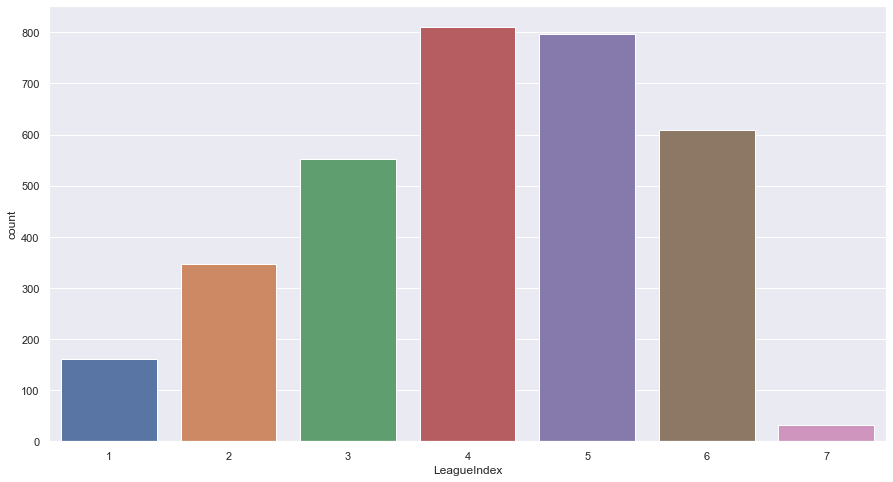

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(x='LeagueIndex',data=df)

In [20]:
correlation=df.corr()
x=correlation.iloc[1].abs().sort_values(ascending=False)
x

LeagueIndex             1.000000
ActionLatency           0.656217
APM                     0.624964
NumberOfPACs            0.582940
GapBetweenPACs          0.538062
AssignToHotkeys         0.480285
SelectByHotkeys         0.429267
UniqueHotkeys           0.316378
WorkersMade             0.306010
TotalHours              0.296887
MinimapAttacks          0.266700
TotalMapExplored        0.223562
HoursPerWeek            0.216072
MinimapRightClicks      0.198431
ComplexUnitsMade        0.169728
ComplexAbilitiesUsed    0.152260
UniqueUnitsMade         0.144809
ActionsInPAC            0.137727
Age                     0.125037
GameID                  0.027308
Name: LeagueIndex, dtype: float64

We can see the most correlated variables with 'LeagueIndex'

<AxesSubplot:xlabel='LeagueIndex', ylabel='ActionLatency'>

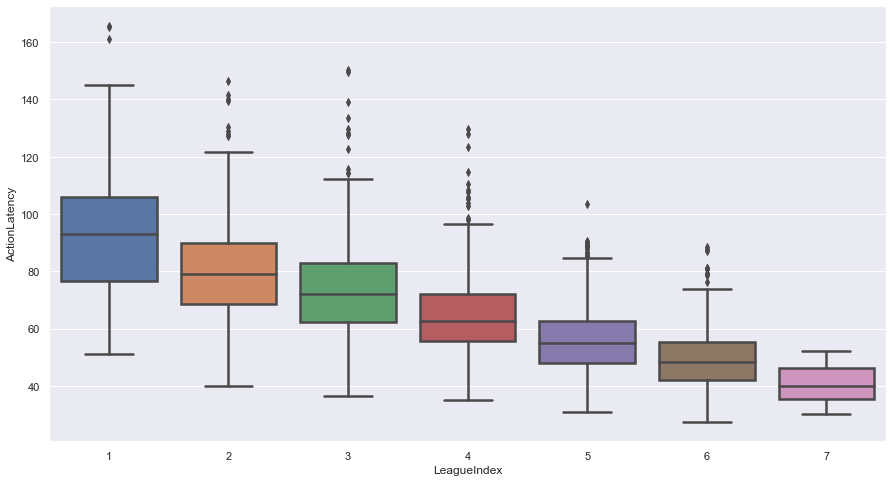

In [21]:
plt.figure(figsize=(15,8))
sns.boxplot(x="LeagueIndex",y="ActionLatency",data=df,linewidth=2.5)

<AxesSubplot:xlabel='LeagueIndex', ylabel='APM'>

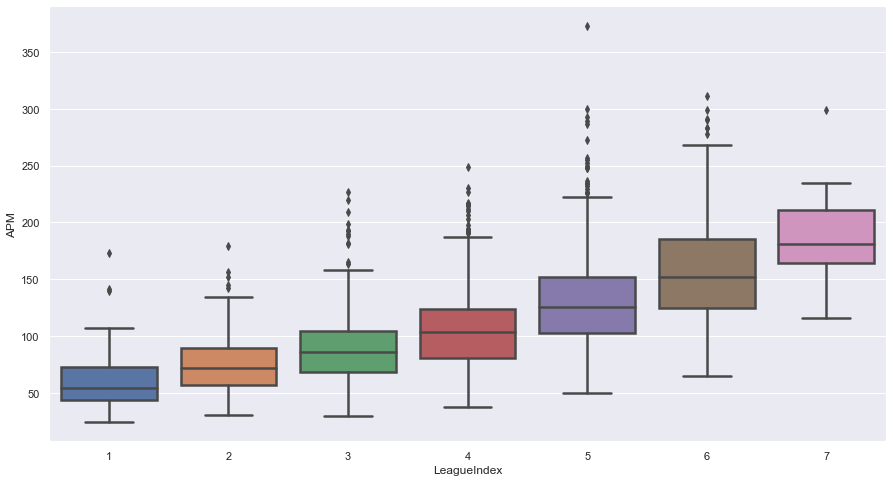

In [22]:
plt.figure(figsize=(15,8))
sns.boxplot(x="LeagueIndex",y="APM",data=df,linewidth=2.5)

<AxesSubplot:xlabel='LeagueIndex', ylabel='NumberOfPACs'>

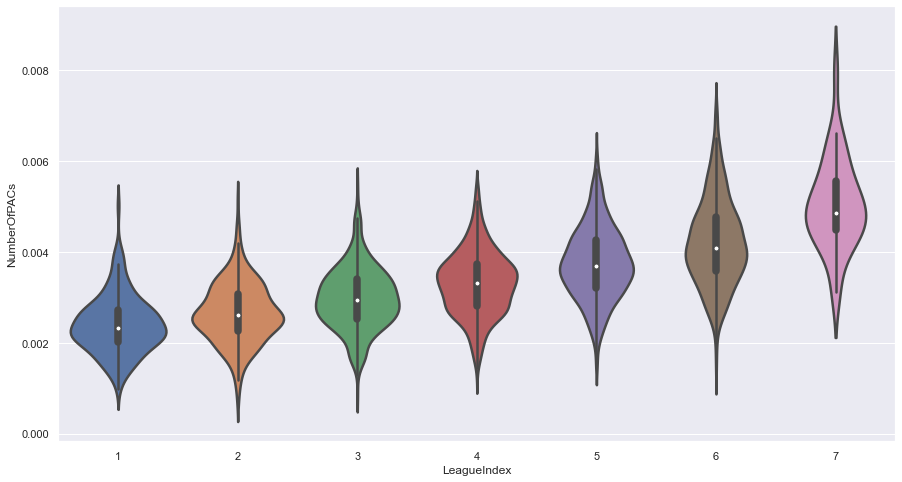

In [23]:
plt.figure(figsize=(15,8))
sns.violinplot(x="LeagueIndex",y="NumberOfPACs",data=df,linewidth=2.5)

<AxesSubplot:xlabel='LeagueIndex', ylabel='AssignToHotkeys'>

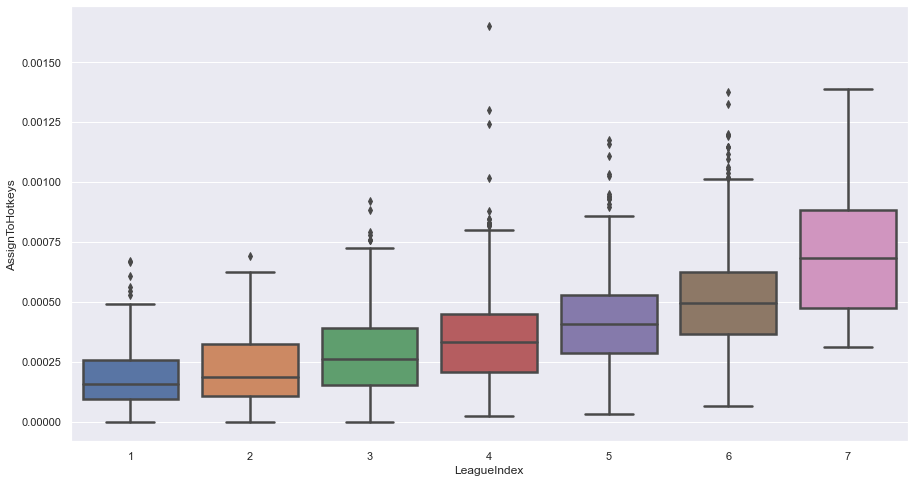

In [24]:
plt.figure(figsize=(15,8))
sns.boxplot(x="LeagueIndex",y="AssignToHotkeys",data=df,linewidth=2.5)

<AxesSubplot:xlabel='LeagueIndex', ylabel='SelectByHotkeys'>

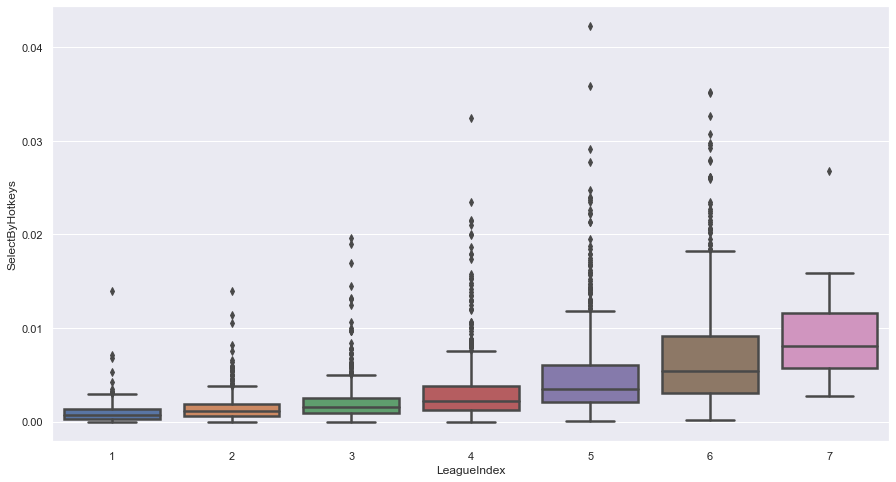

In [25]:
plt.figure(figsize=(15,8))
sns.boxplot(x="LeagueIndex",y="SelectByHotkeys",data=df,linewidth=2.5)

<AxesSubplot:xlabel='LeagueIndex', ylabel='UniqueHotkeys'>

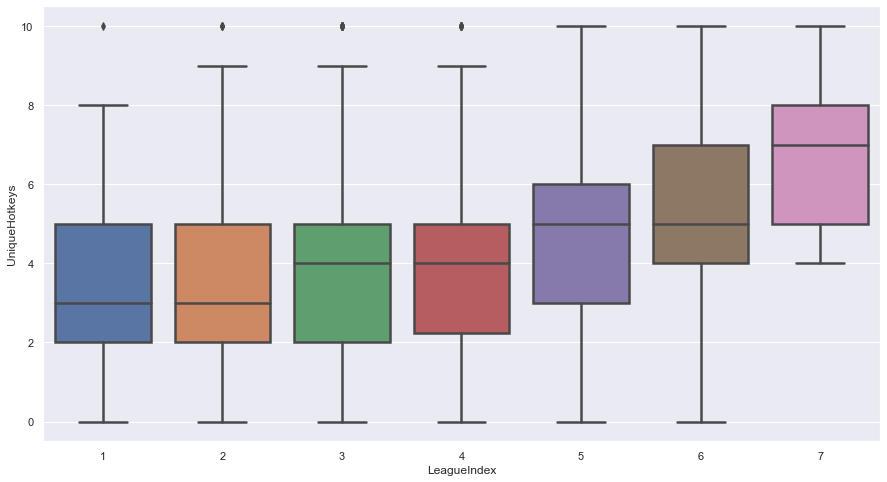

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(x="LeagueIndex",y="UniqueHotkeys",data=df,linewidth=2.5)

<AxesSubplot:xlabel='LeagueIndex', ylabel='Age'>

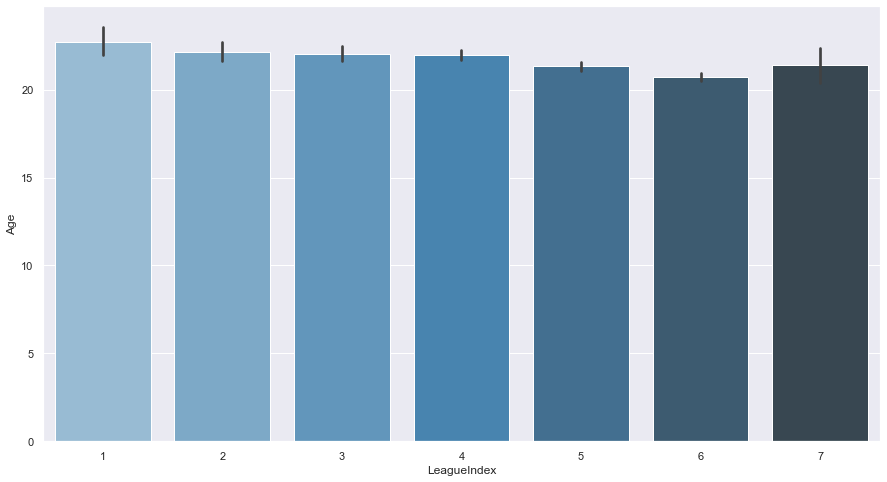

In [27]:
plt.figure(figsize=(15,8))
from numpy import mean
sns.barplot(x='LeagueIndex',y='Age',estimator=mean,data=df, palette="Blues_d")

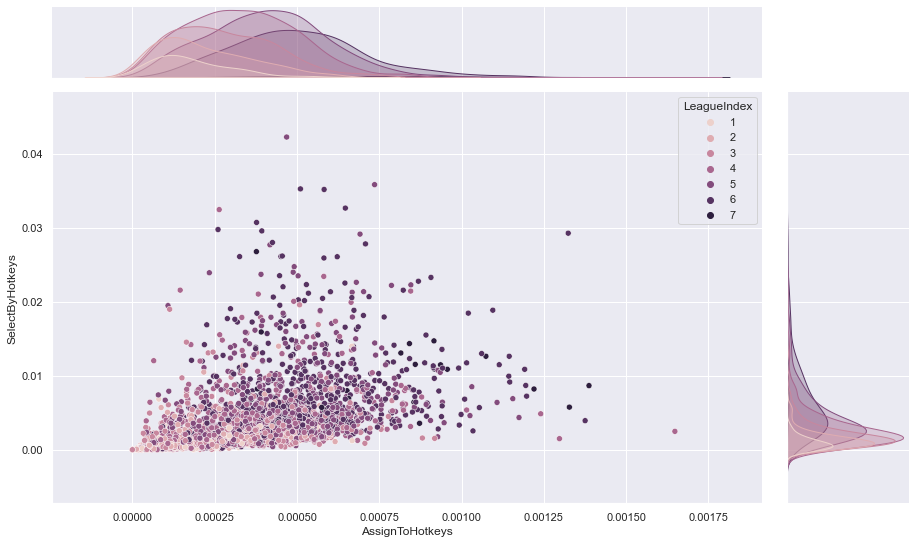

In [28]:
sns.jointplot(x='AssignToHotkeys',
              y="SelectByHotkeys",
              hue='LeagueIndex',
              #kind="kde",
              data=df).fig.set_size_inches(14,8)

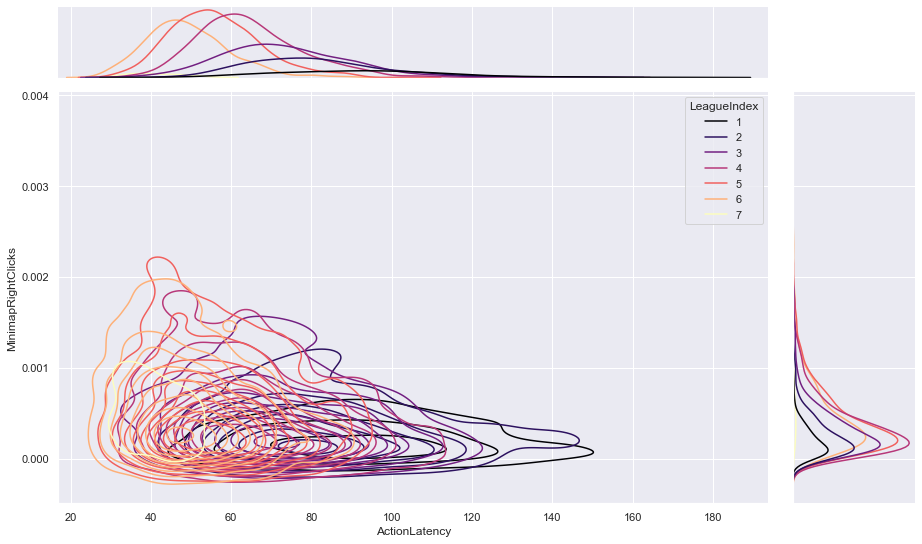

In [29]:
sns.jointplot(x='ActionLatency',
              y="MinimapRightClicks",
              hue='LeagueIndex',
              kind="kde",
              palette="magma",
              data=df).fig.set_size_inches(14,8)

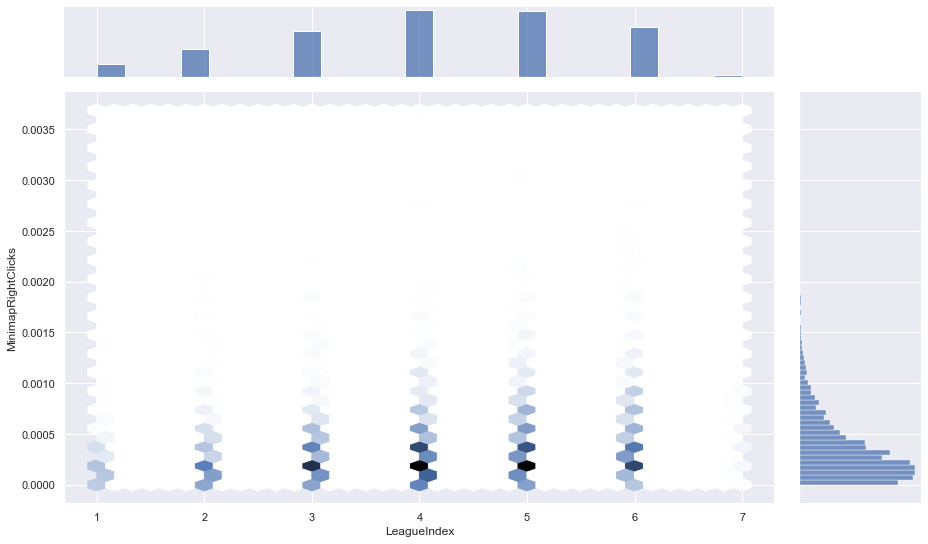

In [30]:
sns.jointplot(x='LeagueIndex',
              y="MinimapRightClicks",
              kind="hex",
              data=df).fig.set_size_inches(14,8)

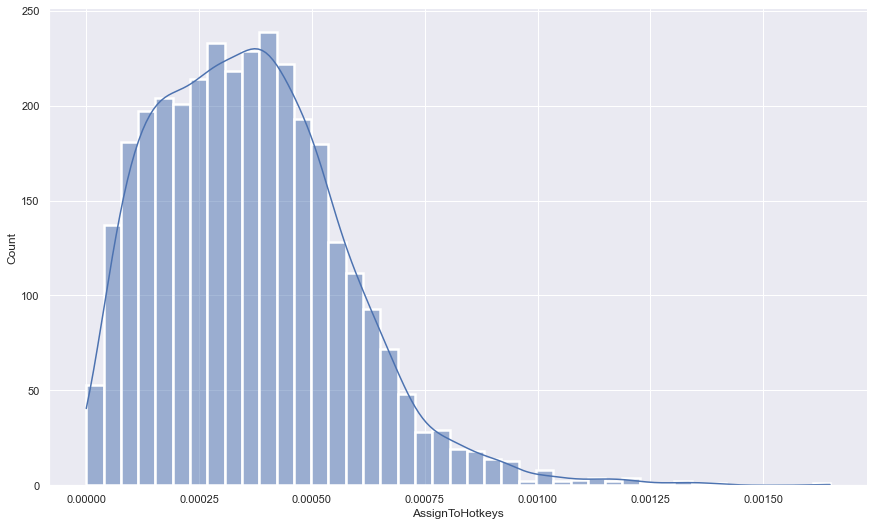

In [31]:
sns.displot(df["AssignToHotkeys"],
            #hue='LeagueIndex',
            kde=True,
            linewidth=2.5,
            #col="LeagueIndex"
           ).fig.set_size_inches(14,8)

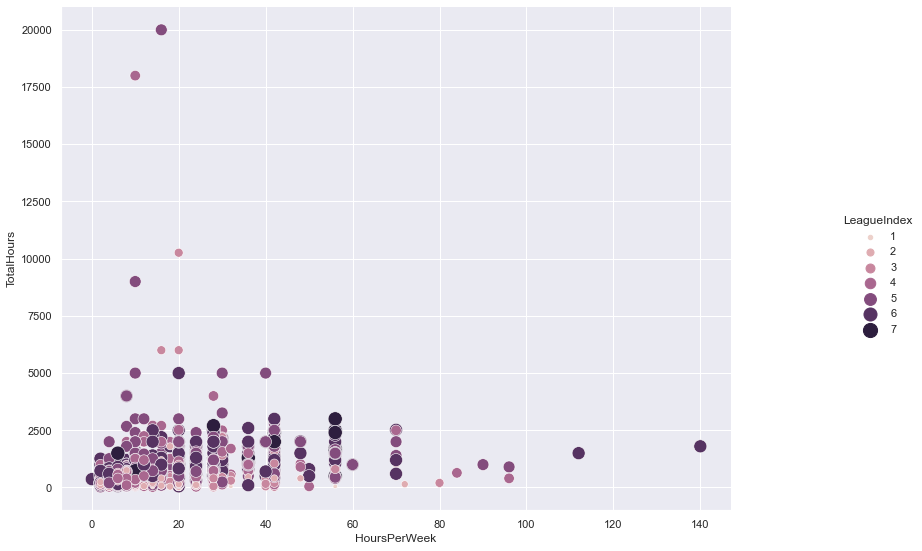

In [32]:

sns.relplot(x="HoursPerWeek",
            y="TotalHours",
            hue="LeagueIndex",
            #style="LeagueIndex",
            size="LeagueIndex",
            sizes=(20,200),
            data=df).fig.set_size_inches(14,8)

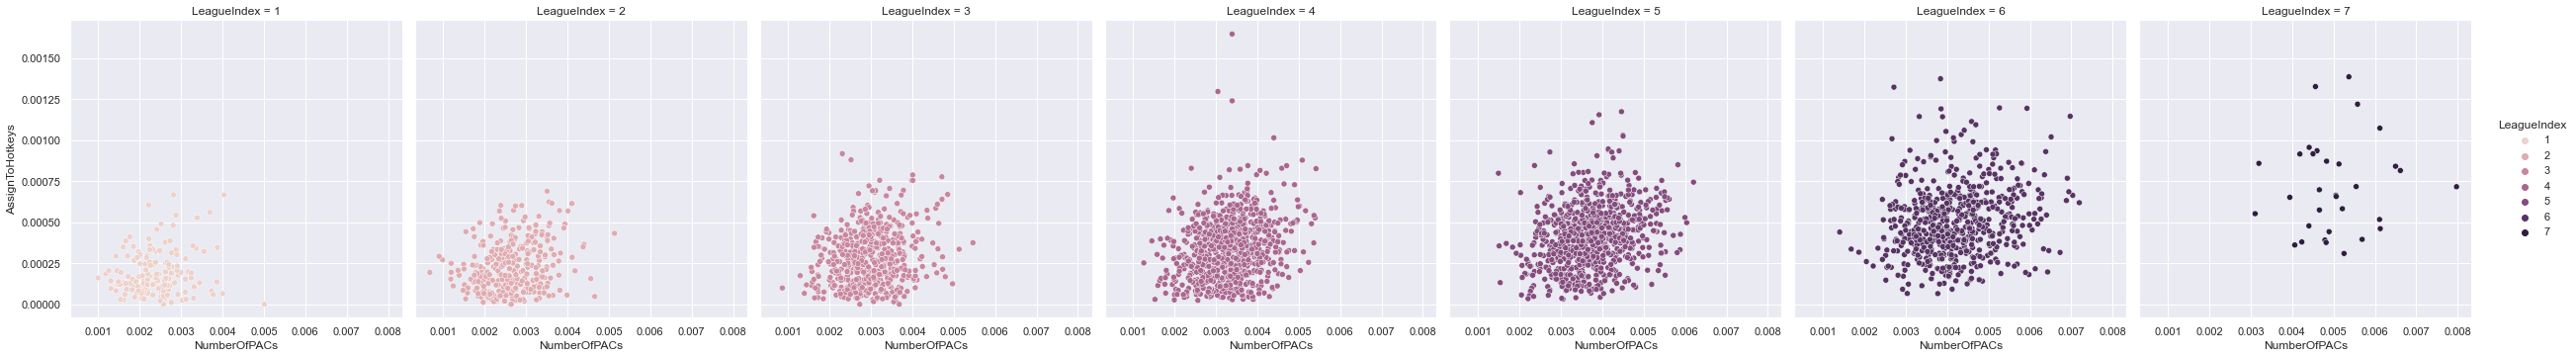

In [33]:
sns.relplot(
    data=df, x="NumberOfPACs", 
    y="AssignToHotkeys", 
    col="LeagueIndex",
    hue="LeagueIndex", 
    sizes=(10, 100)
)
#if you want to zoom, just double click on the plot

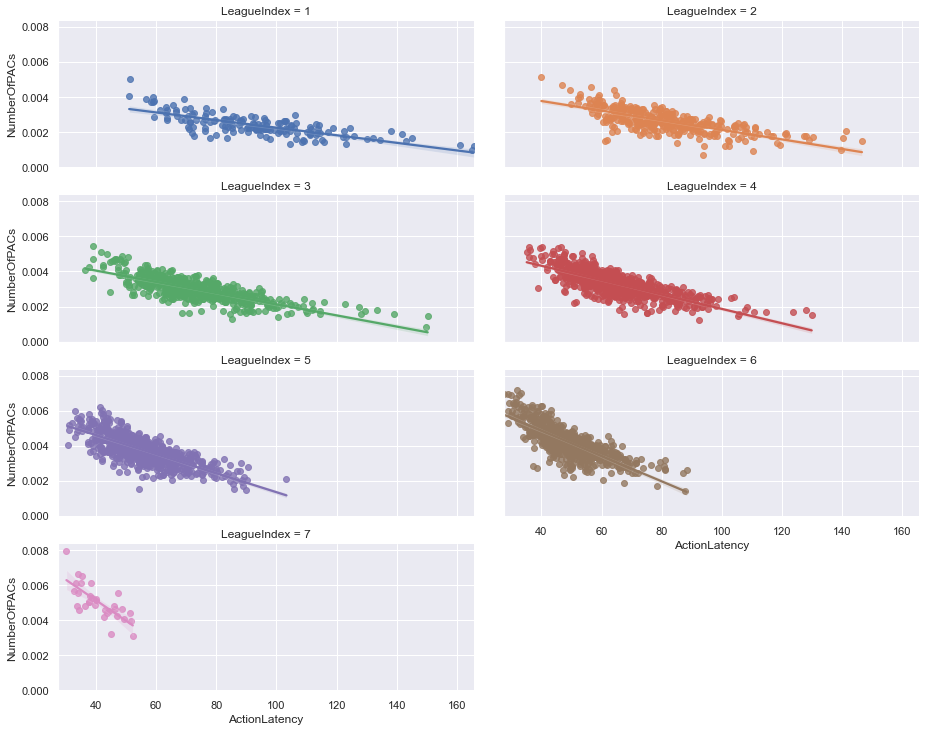

In [34]:
sns.lmplot(x="ActionLatency", 
           y="NumberOfPACs", 
           col="LeagueIndex",
           hue="LeagueIndex",
               data=df, 
           col_wrap=2, 
           height=3).fig.set_size_inches(14,10)

<AxesSubplot:xlabel='LeagueIndex', ylabel='GapBetweenPACs'>

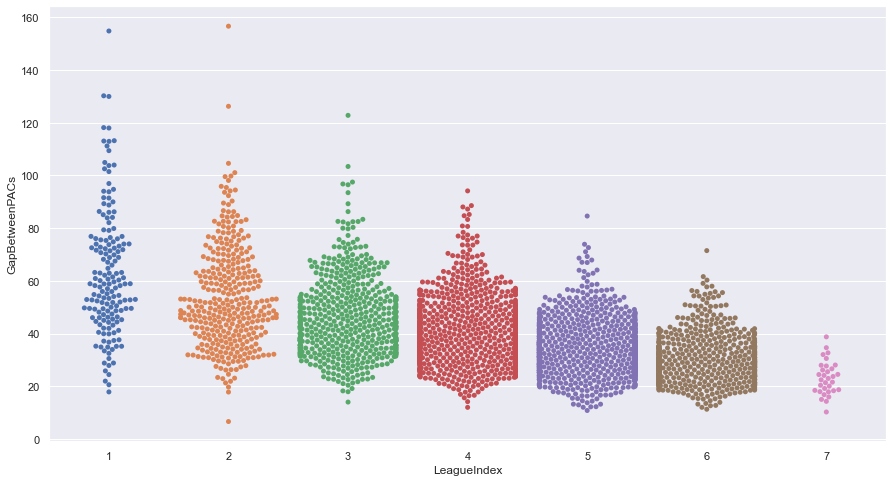

In [35]:
plt.figure(figsize=(15,8))
sns.swarmplot(x='LeagueIndex',y='GapBetweenPACs',data=df)

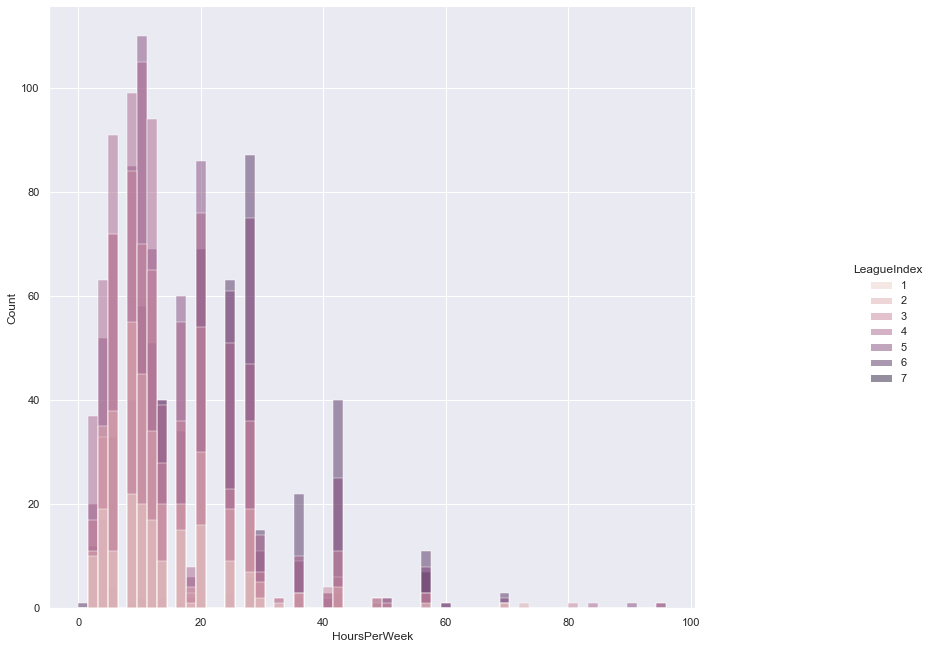

In [36]:
sns.displot(x='HoursPerWeek',
           hue='LeagueIndex',
           data=df[df["HoursPerWeek"]<100]).fig.set_size_inches(14,10)

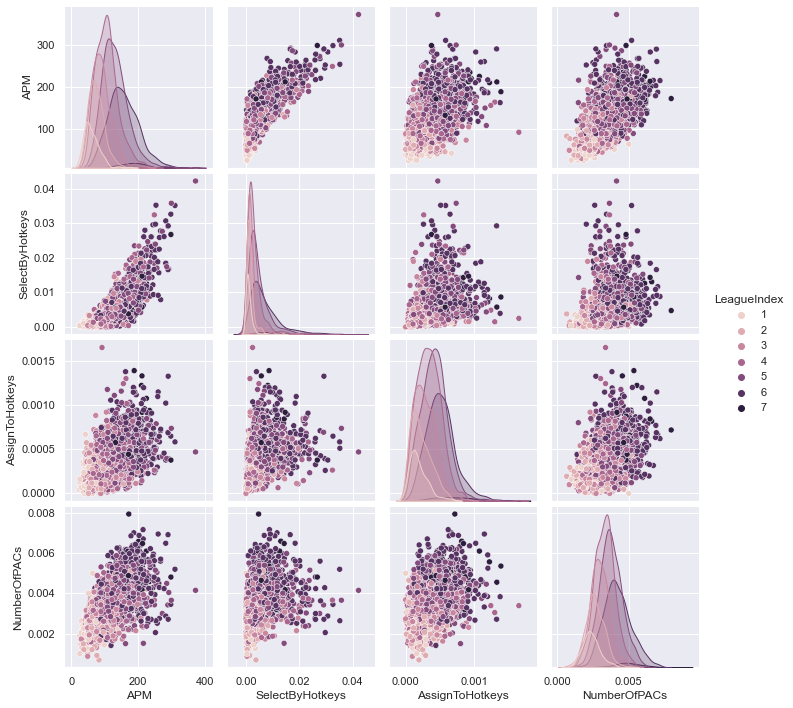

In [37]:
sns.pairplot(
    df,
    x_vars=["APM", "SelectByHotkeys", "AssignToHotkeys","NumberOfPACs"],
    y_vars=["APM", "SelectByHotkeys", "AssignToHotkeys","NumberOfPACs"],
    hue='LeagueIndex'
)

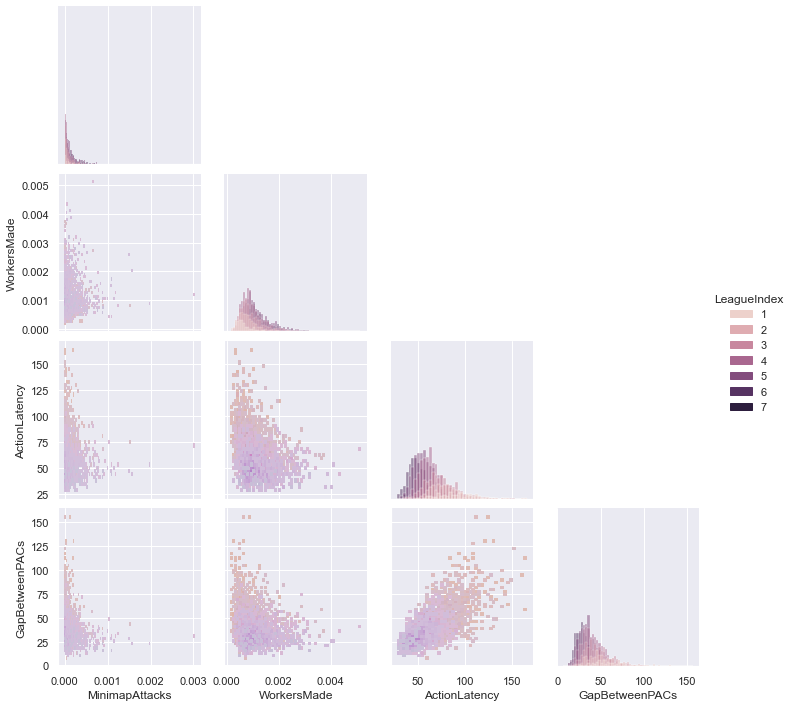

In [38]:
sns.pairplot(
    df,
    x_vars=["MinimapAttacks", "WorkersMade", "ActionLatency","GapBetweenPACs"],
    y_vars=["MinimapAttacks", "WorkersMade", "ActionLatency","GapBetweenPACs"],
    hue='LeagueIndex',
    corner=True,
    kind="hist",
    #diag_kind="hist"
)

In [19]:
allMeans=df.groupby(by="LeagueIndex").mean()
allMeans

,GameID,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
LeagueIndex,,,,,,,,,,,,,,,,,,,
1,4390.588957,22.644172,13.042945,263.558282,60.261870,0.001102,0.000188,3.233129,0.000029,0.000209,0.002392,63.940112,94.024780,4.528624,18.822086,0.000632,5.865031,0.000014,0.000043
2,4669.008671,22.153179,13.329480,332.222543,74.925761,0.001538,0.000222,3.352601,0.000045,0.000276,0.002654,53.509993,80.995191,5.011814,19.846821,0.000802,6.083815,0.000024,0.000076
3,4710.680581,22.054446,13.949183,483.969147,90.023731,0.002192,0.000282,3.686025,0.000056,0.000332,0.002979,46.035834,73.570964,5.153588,20.515426,0.000917,6.372051,0.000045,0.000114
4,4709.593827,21.971605,13.953086,585.176543,105.898386,0.003151,0.000340,3.976543,0.000074,0.000368,0.003311,41.061605,64.769461,5.238987,22.023457,0.001006,6.574074,0.000065,0.000138
5,4701.911139,21.351690,16.160200,780.617021,130.719674,0.004863,0.000413,4.695870,0.000116,0.000426,0.003744,34.742451,56.123641,5.457969,23.100125,0.001168,6.705882,0.000075,0.000177
6,4855.084967,20.709150,20.761438,944.256536,156.778877,0.007186,0.000509,5.485294,0.000155,0.000471,0.004217,30.311700,49.110271,5.469770,24.173203,0.001211,6.859477,0.000077,0.000179
7,4960.906250,21.406250,29.562500,1363.625000,184.355044,0.008971,0.000716,6.718750,0.000323,0.000493,0.005039,23.138188,40.914603,5.195266,27.531250,0.001193,6.968750,0.000085,0.000285


### Visualizations with pyplot

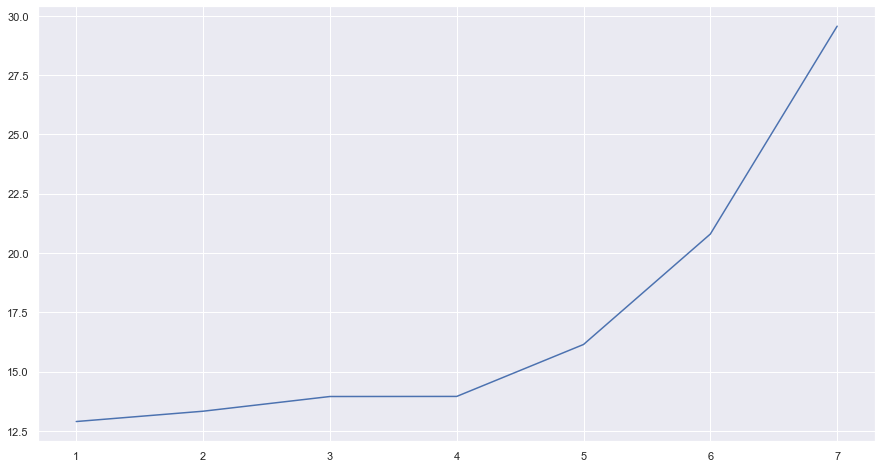

In [40]:
plt.figure(figsize=(15,8))
plt.plot(allMeans.index,allMeans["HoursPerWeek"])

<Figure size 1080x576 with 0 Axes>

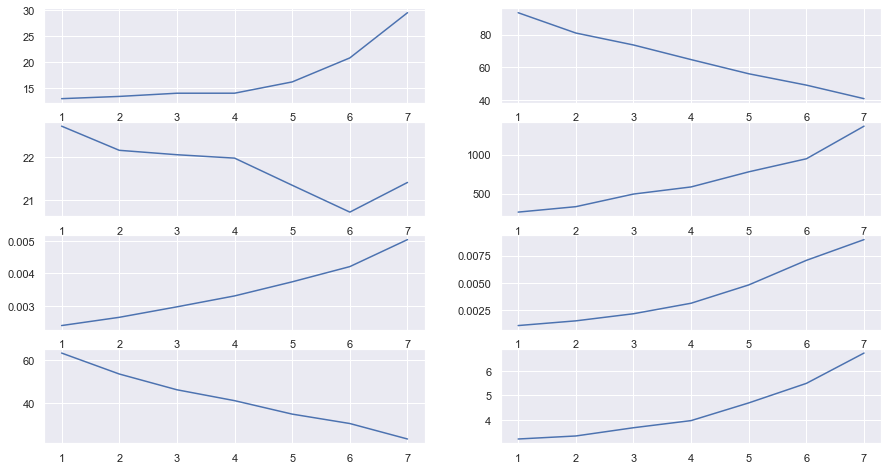

In [41]:
plt.figure(figsize=(15,8))
fig, ax = plt.subplots(4, 2,figsize=(15,8))
ax[0, 0].plot(allMeans.index,allMeans["HoursPerWeek"]) #row=0, col=0
ax[1, 0].plot(allMeans.index,allMeans["Age"]) #row=1, col=0
ax[0, 1].plot(allMeans.index,allMeans["ActionLatency"]) #row=0, col=1
ax[1, 1].plot(allMeans.index,allMeans["TotalHours"]) #row=1, col=1
ax[2, 0].plot(allMeans.index,allMeans["NumberOfPACs"]) 
ax[3, 0].plot(allMeans.index,allMeans["GapBetweenPACs"])
ax[2, 1].plot(allMeans.index,allMeans["SelectByHotkeys"]) 
ax[3, 1].plot(allMeans.index,allMeans["UniqueHotkeys"])
plt.show()

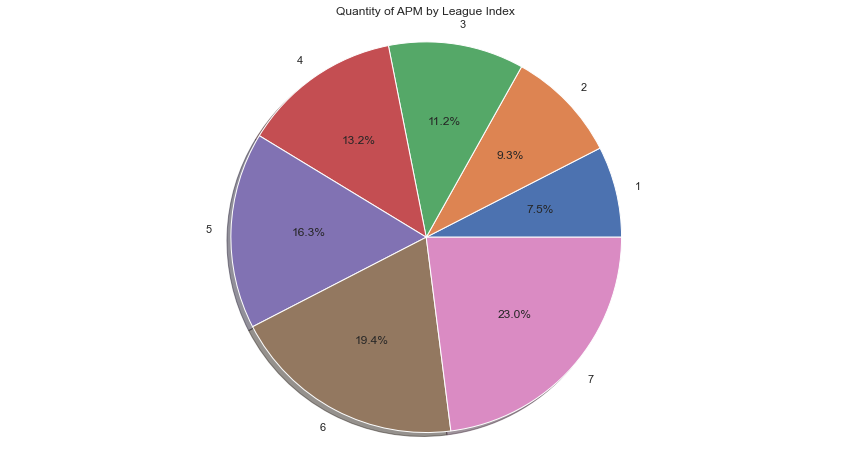

In [42]:
plt.figure(figsize=(15,8))
plt.pie(allMeans['APM'],labels=allMeans.index,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('Quantity of APM by League Index')
plt.show()

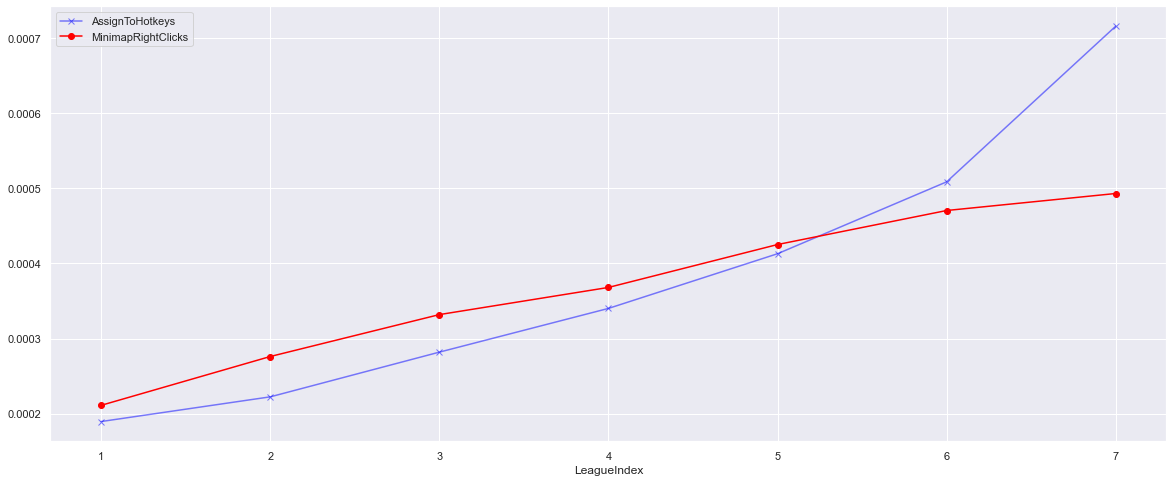

In [43]:
fig,ax=plt.subplots(figsize=(20,8))
ax.plot(allMeans.index,allMeans['AssignToHotkeys'],color="blue",alpha=0.5,marker='x',label='AssignToHotkeys')#half transparent
ax.legend()
ax.plot(allMeans.index,allMeans['MinimapRightClicks'],color="red",marker='o',label='MinimapRightClicks')
ax.legend()
plt.xlabel("LeagueIndex")
plt.show()

### Visualizations with Bokeh

In [20]:
output_notebook()
p = figure( x_axis_label='LeagueIndex', y_axis_label='y')
p.line(allMeans.index, allMeans["GapBetweenPACs"], legend_label="GapBetweenPACs", line_width=2,color="blue")
#p.vbar(x=allMeans.index, top=allMeans["GapBetweenPACs"], legend_label="GapBetweenPACs",color="blue")
p.line(allMeans.index, allMeans["ActionLatency"], legend_label="ActionLatency", line_width=2,color="red",line_dash="4 4")

p.legend.title = "Legend"

p.legend.border_line_width = 3
p.legend.border_line_color = "black"
p.legend.border_line_alpha = 0.8
p.legend.background_fill_color = "navy"
p.legend.background_fill_alpha = 0.1

low_box = BoxAnnotation(top=30, fill_alpha=0.2, fill_color="#F0E442")
mid_box = BoxAnnotation(bottom=30, top=80, fill_alpha=0.2, fill_color="#009E73")
high_box = BoxAnnotation(bottom=80, fill_alpha=0.2, fill_color="#F0E442")

# add boxes to existing figure
p.add_layout(low_box)
p.add_layout(mid_box)
p.add_layout(high_box)

p.width = 800
p.height = 500

curdoc().theme = "light_minimal"

p.xgrid.grid_line_color = "red"
p.toolbar.autohide = True

show(p)

Loading BokehJS ...

In [21]:
output_notebook()
p = figure( x_axis_label='LeagueIndex', y_axis_label='y')
p.line(allMeans.index, allMeans["AssignToHotkeys"], legend_label="AssignToHotkeys", line_width=2,color="blue")
p.width = 800
p.height = 500
colors = ['#%01x%01x%01x' % (255, int(round(value * 255 / 100)), 255) for value in allMeans['ActionLatency']]
circle = p.circle(allMeans.index, allMeans["AssignToHotkeys"], fill_color=colors, line_color="blue", size=25)

p.legend.title = "Legend"
p.legend.location = "top_left"
p.legend.border_line_width = 3
p.legend.border_line_color = "black"
p.legend.border_line_alpha = 0.8
p.legend.background_fill_color = "navy"
p.legend.background_fill_alpha = 0.1

p.toolbar.autohide = True

show(p)

Loading BokehJS ...

In [22]:
output_notebook()
p1 = figure(background_fill_color="#fafafa", x_axis_label='LeagueIndex', y_axis_label="MinimapRightClicks")
p1.vbar(x=allMeans.index, top=allMeans["MinimapRightClicks"], legend_label="MinimapRightClicks", width=0.5, bottom=0, color="blue")
p1.legend.location = "top_left"
p1.toolbar.autohide = True

p2 = figure(background_fill_color="#fafafa",x_axis_label='LeagueIndex', y_axis_label="SelectByHotkeys")
p2.vbar(x=allMeans.index, top=allMeans["SelectByHotkeys"], legend_label="SelectByHotkeys", width=0.5, bottom=0, color="red")
p2.legend.location = "top_left"
p2.toolbar.autohide = True

p3 = figure(background_fill_color="#fafafa",x_axis_label='LeagueIndex' ,y_axis_label="NumberOfPACs")
p3.vbar(x=allMeans.index, top=allMeans["NumberOfPACs"], legend_label="NumberOfPACs", width=0.5, bottom=0, color="green")
p3.legend.location = "top_left"
p3.toolbar.autohide = True

show(row(children=[p1, p2, p3],sizing_mode="scale_width"))

Loading BokehJS ...

In [23]:
output_notebook()
s1 = figure(background_fill_color="#fafafa",x_axis_label='LeagueIndex', y_axis_label="MinimapRightAttacks")
s1.circle(x=allMeans.index, y=allMeans["MinimapAttacks"], size=12, color="blue", alpha=0.8,legend_label="MinimapRightAttacks")
s1.legend.location = "top_left"
s1.toolbar.autohide = True

s2 = figure(background_fill_color="#fafafa",x_axis_label='LeagueIndex', y_axis_label="UniqueUnitsMade")
s2.triangle(x=allMeans.index, y=allMeans["UniqueUnitsMade"], size=12, color="red", alpha=0.8,legend_label="UniqueUnitsMade")
s2.legend.location = "top_left"
s2.toolbar.autohide = True

s3 = figure(background_fill_color="#fafafa",x_axis_label='LeagueIndex', y_axis_label="WorkersMade")
s3.square(x=allMeans.index, y=allMeans["WorkersMade"], size=12, color="green", alpha=0.8,legend_label="WorkersMade")
s3.legend.location = "top_left"
s3.toolbar.autohide = True

show(row(children=[s1, s2, s3], sizing_mode="scale_width"))

Loading BokehJS ...

In [24]:

x=allMeans.index
y=allMeans["ActionsInPAC"]

# Basic plot setup
plot = figure(width=600, height=300, tools="", x_axis_label="LeagueIndex",y_axis_label="ActionsInPAC",
              toolbar_location=None, title='Hover over points')

plot.line(x, y, line_dash="4 4", line_width=1, color='gray')

cr = plot.circle(x, y, size=20,
                fill_color="blue", hover_fill_color="firebrick",
                fill_alpha=0.05, hover_alpha=0.3,
                line_color=None, hover_line_color="white")
plot.width = 800
plot.height = 500

plot.add_tools(HoverTool(tooltips=None, renderers=[cr], mode='hline'))

show(plot)

In [25]:
x = df["LeagueIndex"]
y = df["APM"]

# Basic plot setup
plot = figure(width=400, height=400, title='Select and Zoom',x_axis_label='LeagueIndex',y_axis_label="APM",
              tools="box_select,box_zoom,lasso_select,reset")

plot.circle(x, y, size=5)

select_overlay = plot.select_one(BoxSelectTool).overlay

select_overlay.fill_color = "firebrick"
select_overlay.line_color = None

zoom_overlay = plot.select_one(BoxZoomTool).overlay

zoom_overlay.line_color = "olive"
zoom_overlay.line_width = 8
zoom_overlay.line_dash = "solid"
zoom_overlay.fill_color = None

plot.select_one(LassoSelectTool).overlay.line_dash = [10, 10]

plot.width = 800
plot.height = 500

show(plot)

In [26]:
plot = figure(width=400, height=400)
r = plot.circle(df["LeagueIndex"], df["Age"], radius=0.2, alpha=0.5)

slider = Slider(start=0.01, end=0.5, step=0.01, value=0.1)
slider.js_link('value', r.glyph, 'radius')
plot.toolbar.autohide = True
plot.width = 800
plot.height = 500


show(column(plot, slider))

### Correlations

<AxesSubplot:>

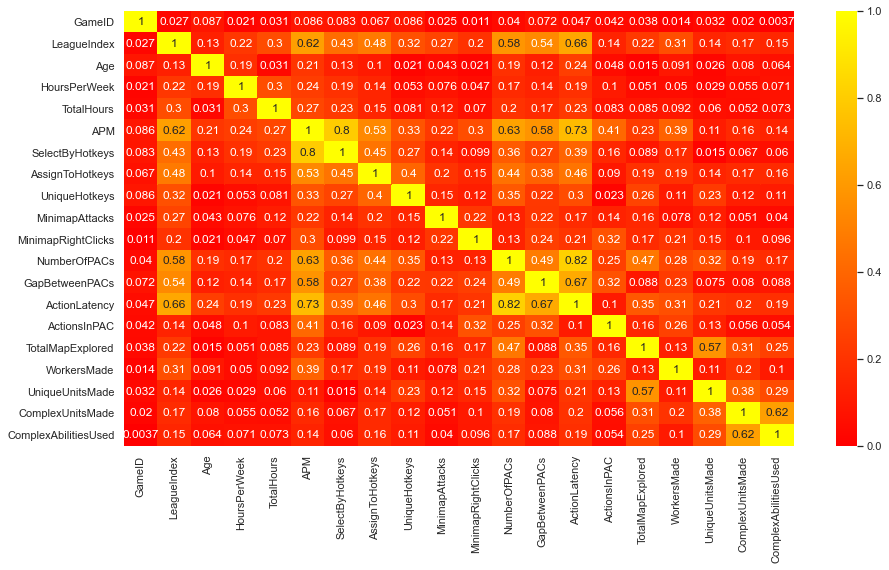

In [51]:

cor=df.corr().abs()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cor,
            cmap='autumn',
            annot=True,
            vmax=1,
            vmin=0,
            linewidths=0,
            #cbar_kws ={"orientation":"horizontal"}
           )
                 

We just keep variables with a correlation of 0.4 or more with LeagueIndex 

In [52]:
df=df.drop([
            "GameID",
            "Age",
            "HoursPerWeek",
            "TotalHours",
            "UniqueHotkeys",
            "MinimapAttacks",
           "MinimapRightClicks",
            "ActionsInPAC",
            "TotalMapExplored",
            "WorkersMade",
            "UniqueUnitsMade",
           "ComplexUnitsMade",
            "ComplexAbilitiesUsed",
           ],axis=1)
df.head()

,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,NumberOfPACs,GapBetweenPACs,ActionLatency
0,5,143.7180,0.003515,0.000220,0.004849,32.6677,40.8673
1,5,129.2322,0.003304,0.000259,0.004307,32.9194,42.3454
2,4,69.9612,0.001101,0.000336,0.002926,44.6475,75.3548
3,3,107.6016,0.001034,0.000213,0.003783,29.2203,53.7352
4,3,122.8908,0.001136,0.000327,0.002368,22.6885,62.0813


<AxesSubplot:>

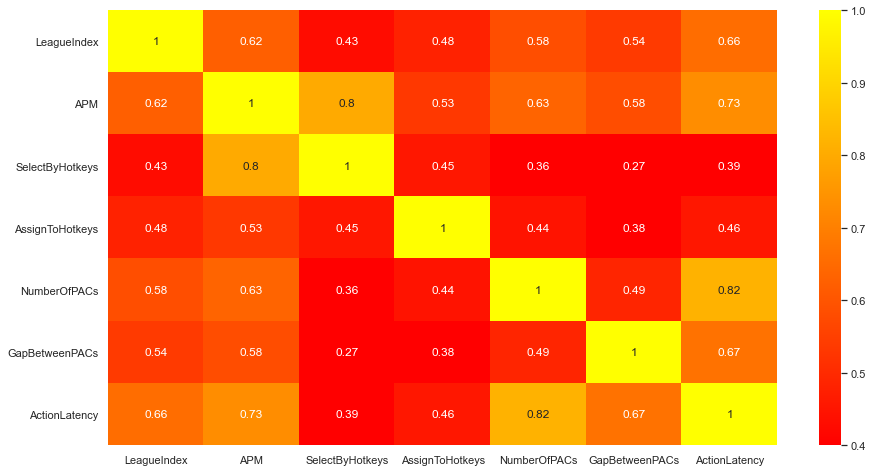

In [53]:

cor=df.corr().abs()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cor,
            cmap='autumn',
            annot=True,
            vmax=1,
            vmin=0.4,
            linewidths=0,
            #cbar_kws ={"orientation":"horizontal"}
           )

In [54]:
#df["LeagueIndex"]=df["LeagueIndex"].replace([1,2,3,4,5,6,7],["Bronze","Silver","Gold","Platinum","Diamond","Master","GrandMaster"])

In [55]:
#plt.figure(figsize=(15,8))
#sns.countplot(x='LeagueIndex',data=df,order=["Bronze","Silver","Gold","Platinum","Diamond","Master","GrandMaster"])

# Our models

In [56]:
#print("Before OverSampling, counts of label '2': {}".format(sum(y_train==2)))
#print("Before OverSampling, counts of label '8': {} \n".format(sum(y_train==8)))
#print("Before OverSampling, counts of label '5': {}".format(sum(y_train==5)))
#print("Before OverSampling, counts of label '6': {} \n".format(sum(y_train==6)))

In [57]:
#pip install imblearn

In [58]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=2)
#X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

In [59]:
#print("After OverSampling, counts of label '2': {}".format(sum(y_train==2)))
#print("After OverSampling, counts of label '8': {} ".format(sum(y_train==8)))
#print("After OverSampling, counts of label '5': {}".format(sum(y_train==5)))
#print("After OverSampling, counts of label '6': {} ".format(sum(y_train==6)))

In [60]:
col = list(df.columns)
col.remove('LeagueIndex')
X = df[col].values
y = df['LeagueIndex'].values
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3)

In [61]:
#X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3)
scaler= StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scaler2=MinMaxScaler()
scaler2.fit(X_train)
X_train2 = scaler2.fit_transform(X_train)
X_test2 = scaler2.transform(X_test)

scaler3=RobustScaler()
scaler3.fit(X_train)
X_train3 = scaler3.fit_transform(X_train)
X_test3 = scaler3.transform(X_test)

scaler4=MaxAbsScaler()
scaler4.fit(X_train)
X_train4 = scaler4.fit_transform(X_train)
X_test4 = scaler4.transform(X_test)

scaler5=Normalizer()
scaler5.fit(X_train)
X_train5 = scaler5.fit_transform(X_train)
X_test5 = scaler5.transform(X_test)

#### PCA (Principal Component Analysis)
We want to reduce the dimensions of our dataset while preserving the maximum variance of our data. By preserving as much variance as possible, we will have the most faithful projection possible to our data. 

In [62]:
from sklearn.decomposition import PCA

#First, we have to find the ideal number of features
n_dims = X_train.shape[1]
model = PCA(n_components=n_dims)
model.fit(X_train)
variances = model.explained_variance_ratio_
meilleur_dims = np.argmax(np.cumsum(variances) > 0.95)
print(f'We need {meilleur_dims} features to have a variance greater than 0.95')

We need 3 features to have a variance greater than 0.95


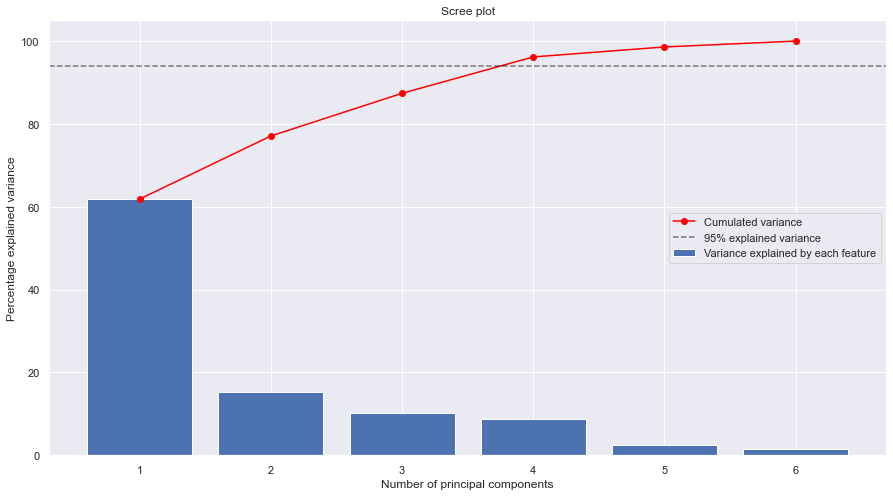

In [63]:
def display_scree_plot(pca):
    '''Display a scree plot for the pca'''

    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree,label='Variance explained by each feature')
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o',label='Cumulated variance')
    line = plt.axhline(94,color='black',ls='--',label ='95% explained variance',alpha=0.5)
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Scree plot")
    plt.legend()
    plt.show(block=False)


display_scree_plot(model)

In [64]:
loadings = pd.DataFrame(model.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], index=col)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6
APM,0.474301,0.264044,-0.266262,-0.016729,-0.237542,0.760077
SelectByHotkeys,0.354085,0.708246,-0.281414,0.002428,0.208281,-0.500430
AssignToHotkeys,0.346873,0.204846,0.900042,-0.160634,-0.041396,0.011205
NumberOfPACs,0.421502,-0.323406,0.045601,0.606437,0.586566,0.061961
GapBetweenPACs,-0.375257,0.398739,0.173108,0.753513,-0.310988,0.075683
ActionLatency,-0.459194,0.350887,0.088258,-0.195866,0.676540,0.402691


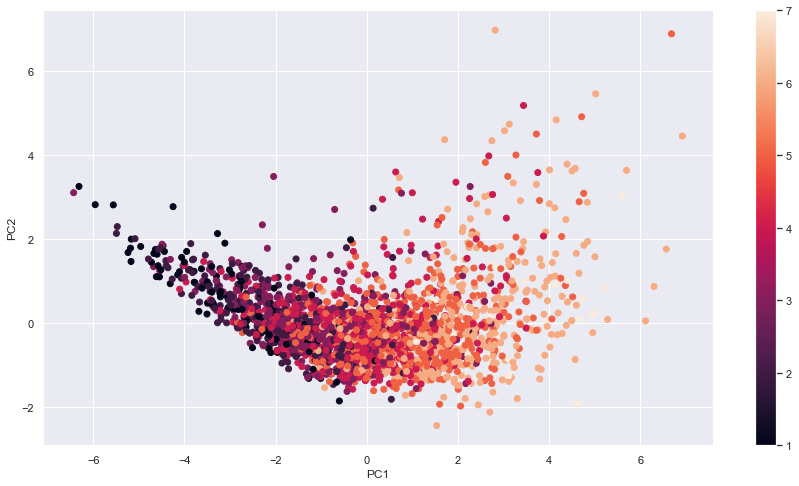

In [65]:
n_dims = X_train.shape[1]
model_pca = PCA(n_components=2)
model_pca.fit(X_train)
X_train_pca = model_pca.transform(X_train)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1],c=y_train)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()

In [87]:
def bestPara(params,model,X,Y):
    grid=GridSearchCV(model,params,n_jobs=-1,cv=5,verbose=1)
    grid.fit(X,Y)
    print('Score : ',grid.best_score_*100,'%')
    print('Best estimator : ',grid.best_estimator_)
    model=grid.best_estimator_
    N,train_score,val_score=learning_curve(model,X,Y,train_sizes=np.linspace(0.2,1.0,10),cv=3)
    #plt.plot(N,train_score.mean(axis=1),label='train')
    plt.plot(N,val_score.mean(axis=1),label='validation',marker="o")
    plt.xlabel('train sizes')
    plt.legend()
    return grid
    

def resultsClassification(model,X_train,Y_train,X_test,Y_test):
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    print("Accuracy Score:",round(accuracy_score(Y_test,y_pred),5))
    print ('F1 score:', round(f1_score(Y_test, y_pred,average='weighted'),5))
    print ('Recall:', round(recall_score(Y_test, y_pred,average='weighted'),5))
    print ('Precision:', round(precision_score(Y_test, y_pred,zero_division=0,average='weighted'),5))
    #print('AUC:',roc_auc_score(Y_test,model.decision_function(X_train),multi_class='ovr'))
    conf_matrix(Y_test,y_pred)
    plt.xlabel('Predicted label', fontsize = 15) 
    plt.ylabel('True label', fontsize = 15) 

def conf_matrix(y,y_pred):
    cf_matrix = confusion_matrix(y, y_pred)
    size=np.shape(cf_matrix)[0]
    sns.set(rc = {'figure.figsize':(15,8)})
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v2}\n{v3}" for v2, v3 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(size,size)
    sns.heatmap(cf_matrix,annot=labels, fmt="", cmap='autumn')
    


In [ ]:
acc_dict={}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Score :  37.12023038156948 %
Best estimator :  GaussianNB()


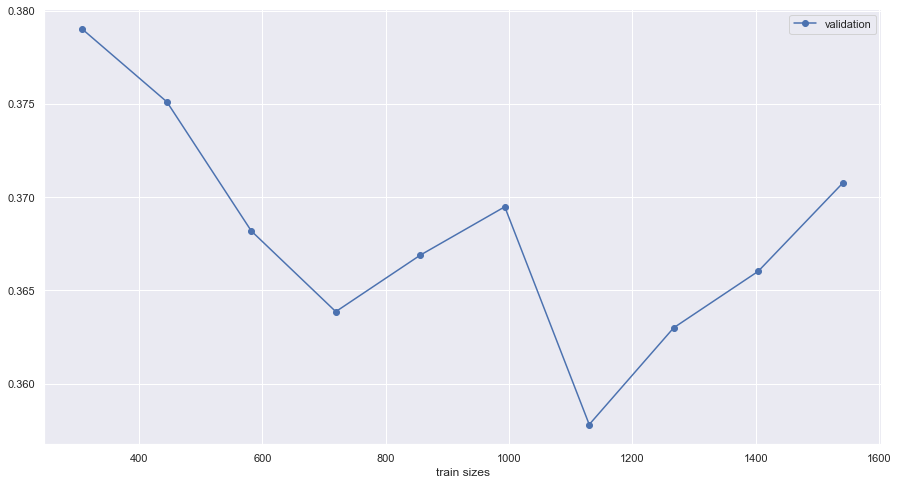

In [67]:
parameters = {
                'priors':[None],
                'var_smoothing':[1e-09]
}
grid=bestPara(parameters,GaussianNB(),X_train,y_train)
acc_dict["GaussianNB"]=grid.best_score_*100

Fitting 5 folds for each of 5600 candidates, totalling 28000 fits
Score :  37.812310080128654 %
Best estimator :  DecisionTreeClassifier(max_depth=9, max_features='sqrt', max_leaf_nodes=20,
                       min_weight_fraction_leaf=0.1)


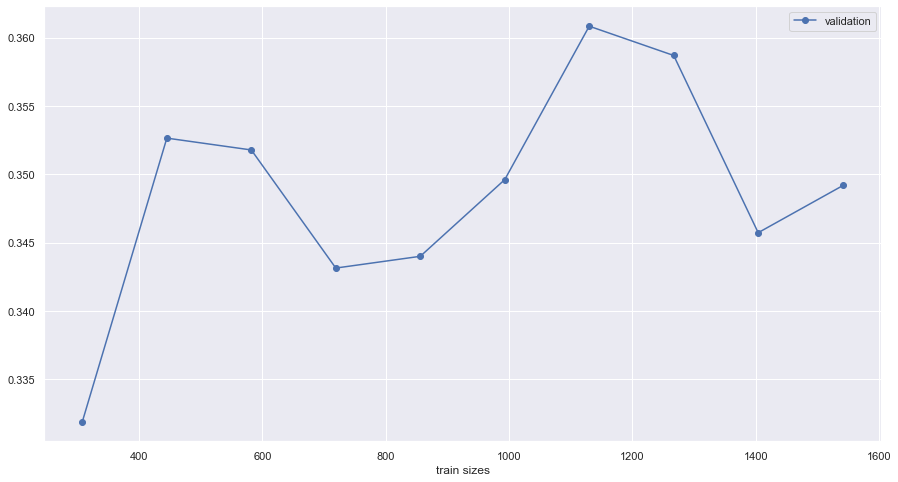

In [68]:
parameters={
            #'splitter':["best","random"],
            'max_depth':[4,5,6,7,8,9,10],
            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
            "min_weight_fraction_leaf":[0.1,0.2],
            "max_features":["auto","log2","sqrt",None],
            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] 
           }
grid=bestPara(parameters,DecisionTreeClassifier(),X_train,y_train)
acc_dict["DecisionTreeClassifier"]=grid.best_score_*100

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Score :  38.805550101446435 %
Best estimator :  QuadraticDiscriminantAnalysis(reg_param=0.85, store_covariance=True)


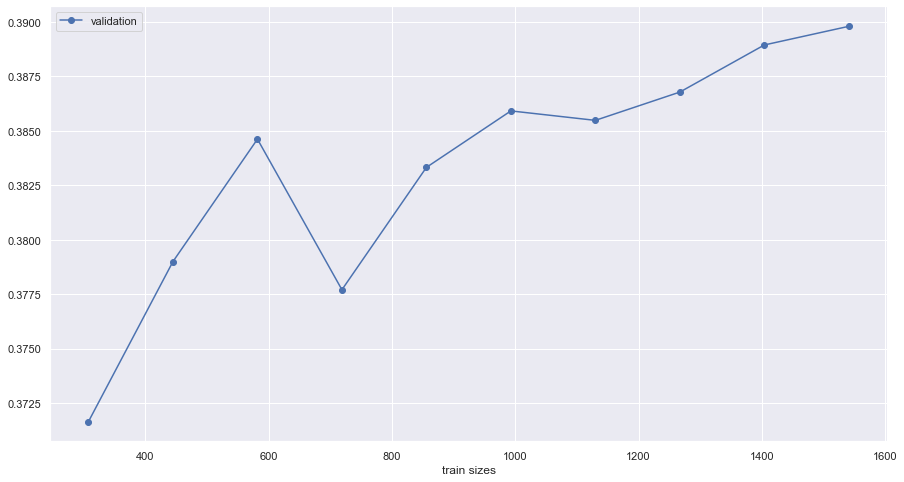

In [69]:
parameters = {
           'reg_param': [0.85,0.935,0.87,1],
            'store_covariance':[True,False]
}
grid=bestPara(parameters,QuadraticDiscriminantAnalysis(),X_train,y_train)
acc_dict["QuadraticDiscriminantAnalysis"]=grid.best_score_*100

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Score :  37.68225295223135 %
Best estimator :  LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')


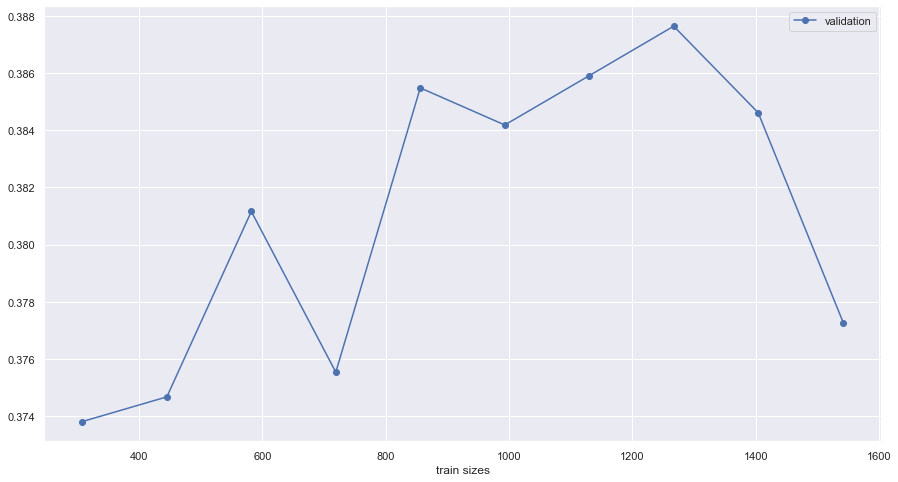

In [70]:
parameters = {
                'solver': ['svd', 'lsqr', 'eigen'],
                'shrinkage':['auto',None]
            }
grid=bestPara(parameters,LinearDiscriminantAnalysis(),X_train,y_train)
acc_dict["LinearDiscriminantAnalysis"]=grid.best_score_*100

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Score :  39.32437612783185 %
Best estimator :  AdaBoostClassifier(base_estimator=LogisticRegression(C=0.6), n_estimators=20)


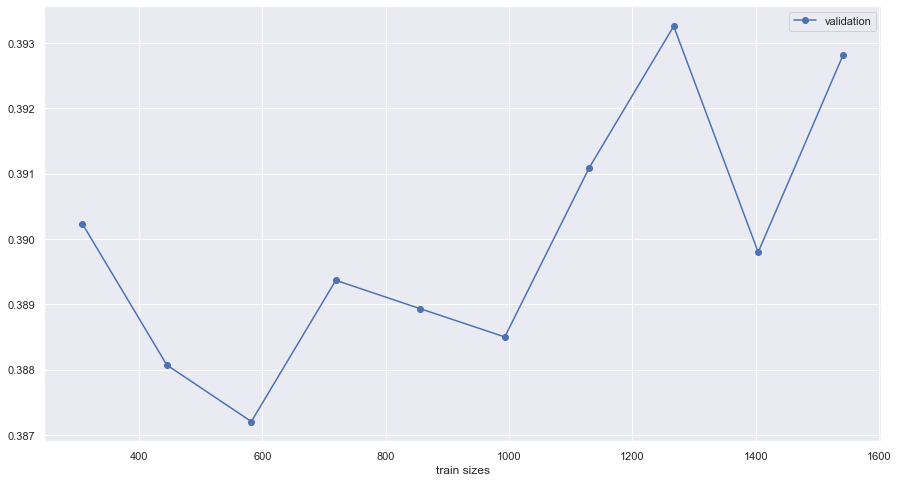

In [71]:
clf=LogisticRegression()
ada = AdaBoostClassifier(clf)
parameters = {'base_estimator__C' :[0.6],
              'n_estimators' :[ 20],
              #'learning_rate' :[0.0001, 0.001, 0.01, 0.1, 1]
             }
grid=bestPara(parameters,ada,X_train,y_train)
acc_dict["AdaBoost"]=grid.best_score_*100

Fitting 5 folds for each of 228 candidates, totalling 1140 fits
Score :  37.034304788084484 %
Best estimator :  KNeighborsClassifier(leaf_size=1, metric='euclidean', n_neighbors=19, p=1,
                     weights='distance')


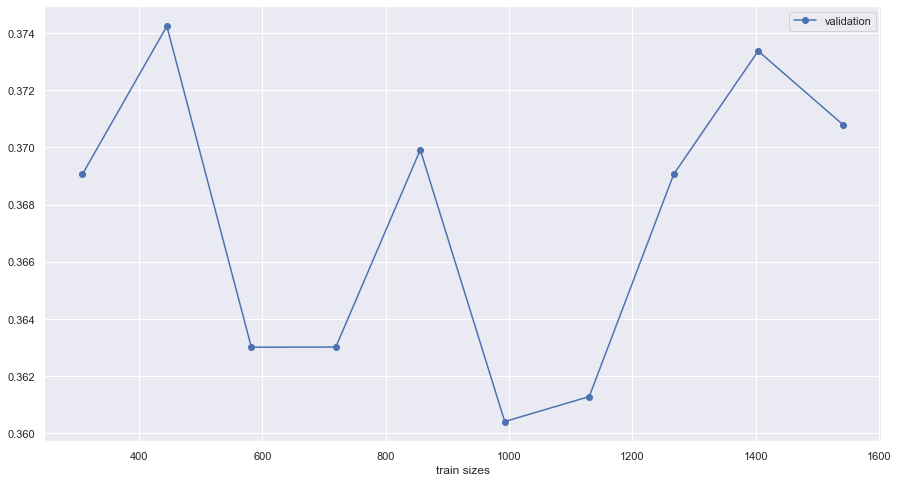

In [72]:
parameters={
            'weights':['uniform','distance'],
            'metric' : ['manhattan','euclidean','minkowski'],
            'leaf_size': [1], 
            'n_neighbors': list(range(1,20)), 
            'p': [1, 2]
           }
grid=bestPara(parameters,KNeighborsClassifier(),X_train3,y_train)
acc_dict["KNeighborsClassifier"]=grid.best_score_*100

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Score :  39.36785316914907 %
Best estimator :  SVC(C=1)


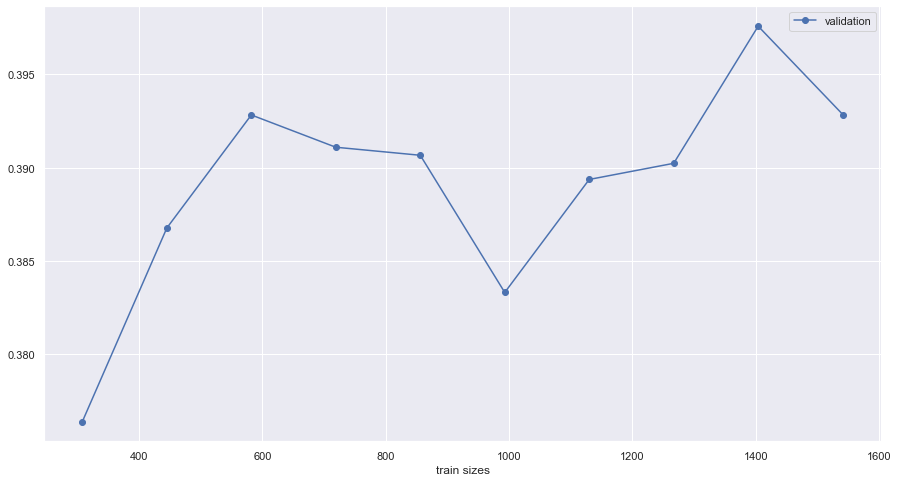

In [73]:
parameters = {
                'C': [0.1,1, 10, 100], 
                'gamma': [1,0.1,0.01,0.001],
                'kernel': ['rbf', 'poly', 'sigmoid'],
                'gamma':['scale','auto']
            }
grid=bestPara(parameters,SVC(),X_train,y_train)
acc_dict["SVC"]=grid.best_score_*100

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Score :  37.855974119473046 %
Best estimator :  RandomForestClassifier(max_features=4, min_samples_split=6, n_estimators=25)


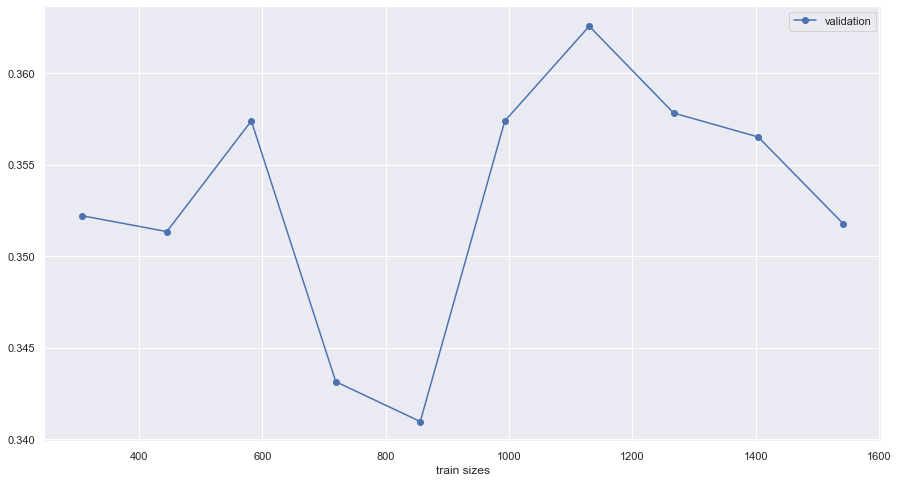

In [74]:
parameters={
            'n_estimators': [10,15,20, 25], 
            'max_features': [3,4,5,6], 
            'max_depth': [60,65, None], 
            #'bootstrap': [True, False],
            #'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [4, 5, 6]
           }
grid=bestPara(parameters,RandomForestClassifier(),X_train,y_train)
acc_dict["RandomForestClassifier"]=grid.best_score_*100

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Score :  40.01589483230951 %
Best estimator :  LogisticRegression(C=8, penalty='l1', solver='saga')


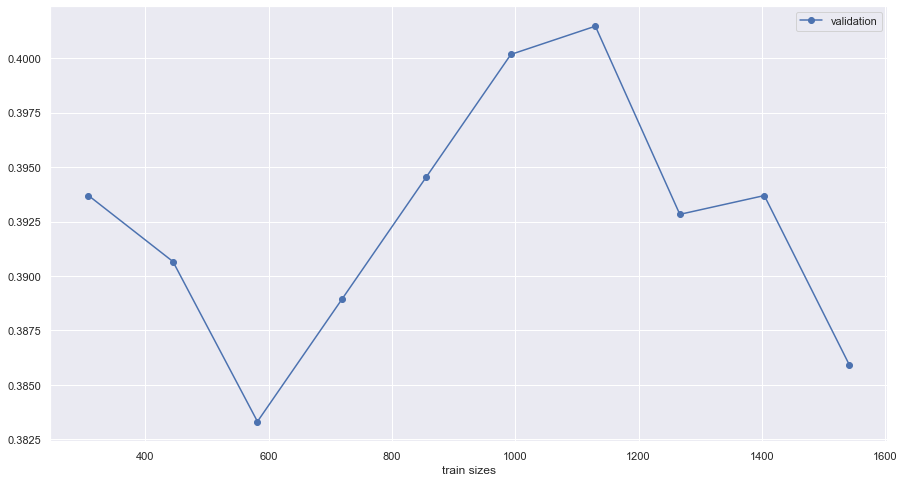

In [75]:

parameters={
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'penalty' : ['l2','l1', 'elasticnet', 'none'],
            'C' : [100, 10, 1.0,8],
            'class_weight':[None,'balanced'],
            #'fit_intercept':[True,False],
            #'multi_class':['auto', 'ovr', 'multinomial']
           }
grid=bestPara(parameters,LogisticRegression(),X_train2,y_train)
acc_dict["LogisticRegression"]=grid.best_score_*100

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Score :  37.1642684169682 %
Best estimator :  GradientBoostingClassifier(max_depth=1)


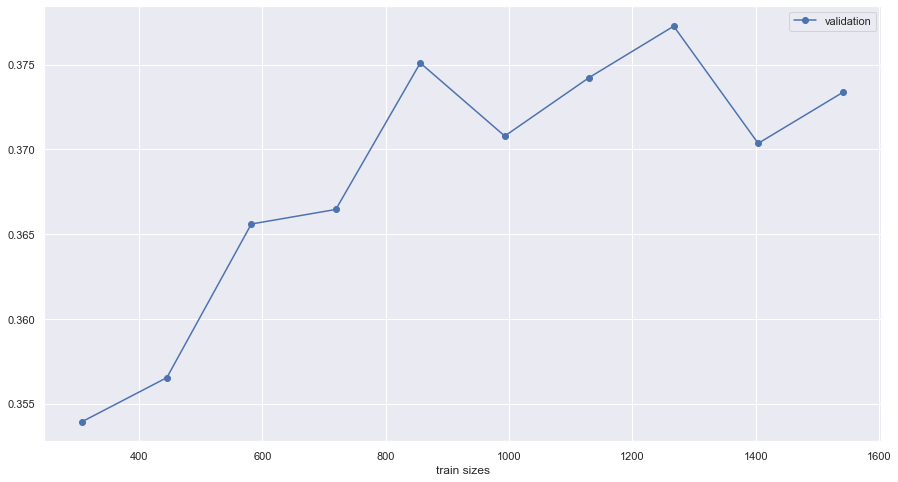

In [76]:
#GradientBoostingClassifier(n_estimators=100,random_state=SEED,verbose=1)
parameters={
            #'loss':['deviance','exponential'],
            #'criterion':['friedman_mse', 'squared_error', 'mse', 'mae'],
            'max_depth':[1,3,5],
            #'max_features':['auto', 'sqrt', 'log2'],
            'min_samples_leaf':[1,2,3]
}

grid=bestPara(parameters,GradientBoostingClassifier(),X_train,y_train)
acc_dict["GradientBoostingClassifier"]=grid.best_score_*100

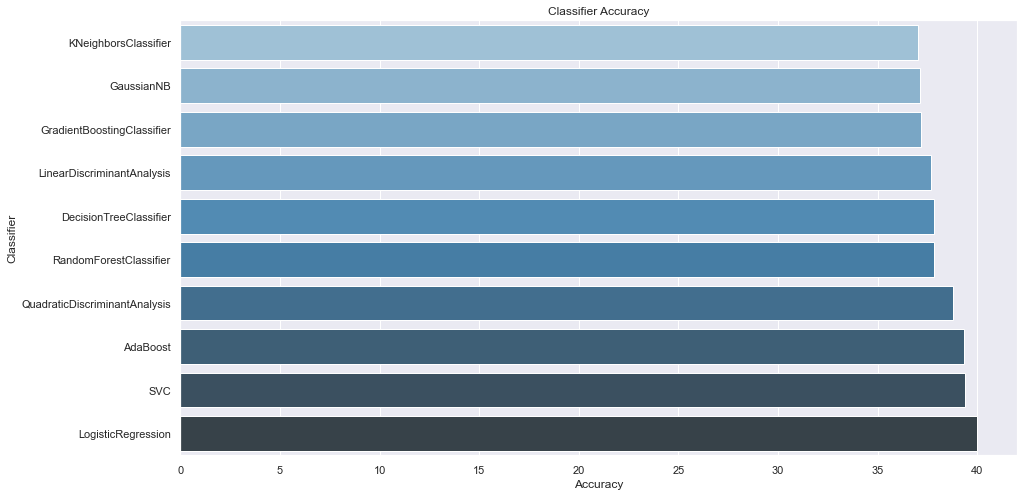

In [77]:
def allModels(acc_dict):
    acc_dict=dict(sorted(acc_dict.items(), key=lambda item: item[1]))
    result_models=pd.DataFrame(list(acc_dict.items()),columns=['Classifier', 'Accuracy'])
    plt.title('Classifier Accuracy')
    sns.barplot(x='Accuracy', y='Classifier', data=result_models, color="b",palette="Blues_d")
    
allModels(acc_dict)

Accuracy Score: 0.39376
F1 score: 0.38901
Recall: 0.39376
Precision: 0.39099
Labels are the LeagueIndex-1


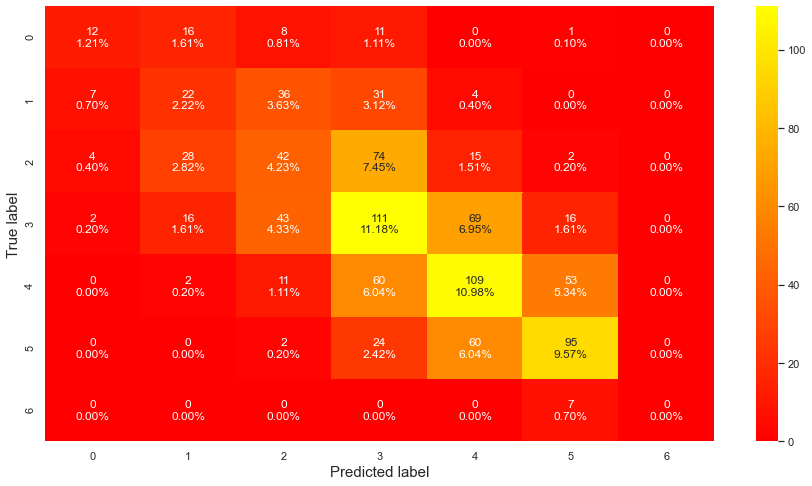

In [89]:
resultsClassification(LogisticRegression(C=8, penalty='l1', solver='saga')
                      ,X_train,y_train,X_test,y_test)
print("(Labels are the LeagueIndex-1)")

# With 2 classes

In [90]:
df["LeagueIndex"]=df["LeagueIndex"].replace([1,2,3,4,5,6,7],[10,10,10,10,11,11,11])
df["LeagueIndex"]=df["LeagueIndex"].replace([10,11],[0,1])
df.head()

,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,NumberOfPACs,GapBetweenPACs,ActionLatency
0,1,143.7180,0.003515,0.000220,0.004849,32.6677,40.8673
1,1,129.2322,0.003304,0.000259,0.004307,32.9194,42.3454
2,0,69.9612,0.001101,0.000336,0.002926,44.6475,75.3548
3,0,107.6016,0.001034,0.000213,0.003783,29.2203,53.7352
4,0,122.8908,0.001136,0.000327,0.002368,22.6885,62.0813


In [91]:
df["LeagueIndex"].unique()

array([1, 0], dtype=int64)

League Index 1,2,3,4 are now 0 and old 5,6,7 are now 1

In [92]:
col = list(df.columns)
col.remove('LeagueIndex')
X = df[col].values
y = df['LeagueIndex'].values
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3)

In [93]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scaler2=MinMaxScaler()
scaler2.fit(X_train)
X_train2 = scaler2.fit_transform(X_train)
X_test2 = scaler2.transform(X_test)

scaler3=RobustScaler()
scaler3.fit(X_train)
X_train3 = scaler3.fit_transform(X_train)
X_test3 = scaler3.transform(X_test)

scaler4=MaxAbsScaler()
scaler4.fit(X_train)
X_train4 = scaler4.fit_transform(X_train)
X_test4 = scaler4.transform(X_test)

scaler5=Normalizer()
scaler5.fit(X_train)
X_train5 = scaler5.fit_transform(X_train)
X_test5 = scaler5.transform(X_test)

In [94]:
acc_dict={}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Score :  78.218843791198 %
Best estimator :  GaussianNB()


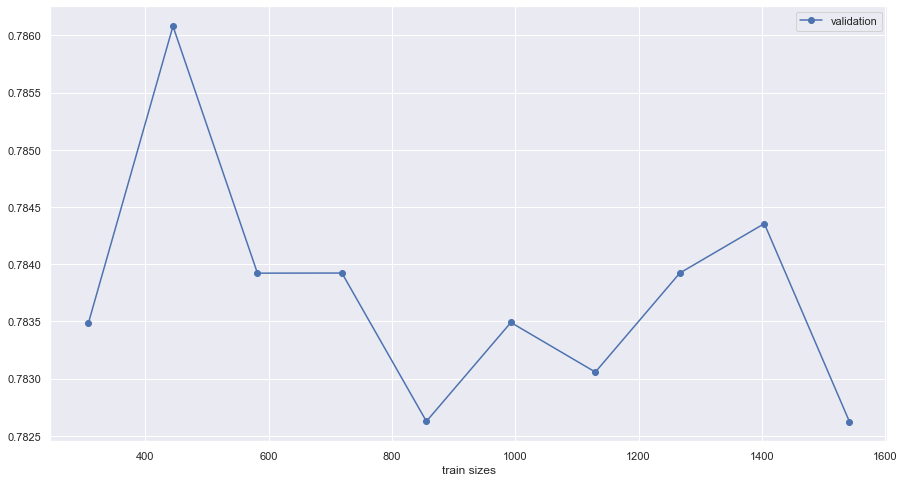

In [95]:
parameters = {
                'priors':[None],
                'var_smoothing':[1e-09]
}
grid=bestPara(parameters,GaussianNB(),X_train,y_train)
acc_dict["GaussianNB"]=grid.best_score_*100

Fitting 5 folds for each of 5600 candidates, totalling 28000 fits
Score :  78.17517975185362 %
Best estimator :  DecisionTreeClassifier(max_depth=8, max_features='auto', max_leaf_nodes=50,
                       min_samples_leaf=9, min_weight_fraction_leaf=0.1)


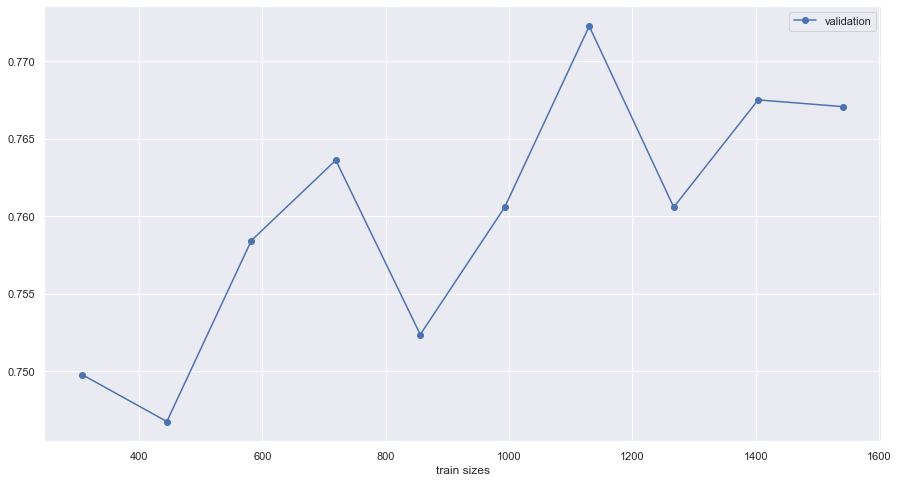

In [96]:
parameters={
            #'splitter':["best","random"],
            'max_depth':[4,5,6,7,8,9,10],
            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
            "min_weight_fraction_leaf":[0.1,0.2],
            "max_features":["auto","log2","sqrt",None],
            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] 
           }
grid=bestPara(parameters,DecisionTreeClassifier(),X_train,y_train)
acc_dict["DecisionTreeClassifier"]=grid.best_score_*100

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Score :  78.69400577823905 %
Best estimator :  QuadraticDiscriminantAnalysis(reg_param=0.85, store_covariance=True)


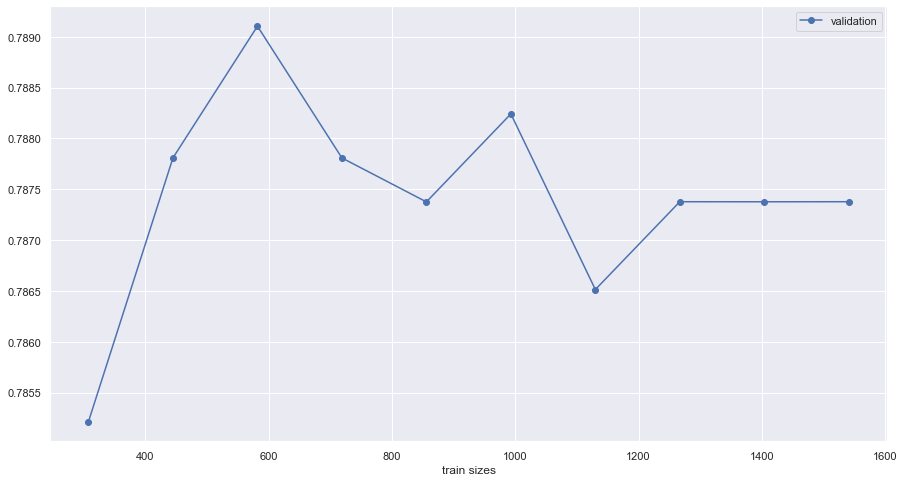

In [97]:
parameters = {
           'reg_param': [0.85,0.935,0.87,1],
            'store_covariance':[True,False]
}
grid=bestPara(parameters,QuadraticDiscriminantAnalysis(),X_train,y_train)
acc_dict["QuadraticDiscriminantAnalysis"]=grid.best_score_*100

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Score :  78.91008199863492 %
Best estimator :  LinearDiscriminantAnalysis()


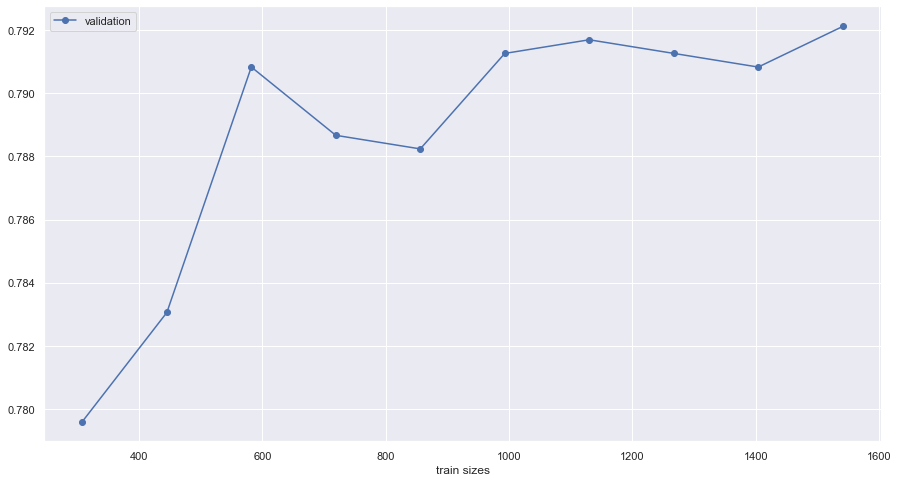

In [98]:
parameters = {
                'solver': ['svd', 'lsqr', 'eigen'],
                'shrinkage':['auto',None]
            }
grid=bestPara(parameters,LinearDiscriminantAnalysis(),X_train,y_train)
acc_dict["LinearDiscriminantAnalysis"]=grid.best_score_*100

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Score :  79.0395781324507 %
Best estimator :  AdaBoostClassifier(base_estimator=LogisticRegression(C=0.6), n_estimators=20)


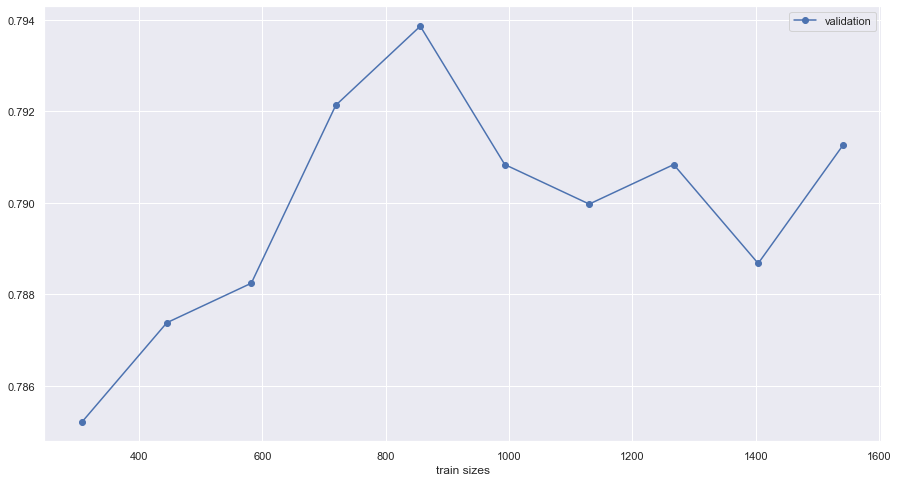

In [99]:
clf=LogisticRegression()
ada = AdaBoostClassifier(clf)
parameters = {'base_estimator__C' :[0.6],
              'n_estimators' :[ 20],
              #'learning_rate' :[0.0001, 0.001, 0.01, 0.1, 1]
             }
grid=bestPara(parameters,ada,X_train,y_train)
acc_dict["AdaBoost"]=grid.best_score_*100

Fitting 5 folds for each of 228 candidates, totalling 1140 fits
Score :  78.69419277626622 %
Best estimator :  KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=18, p=1)


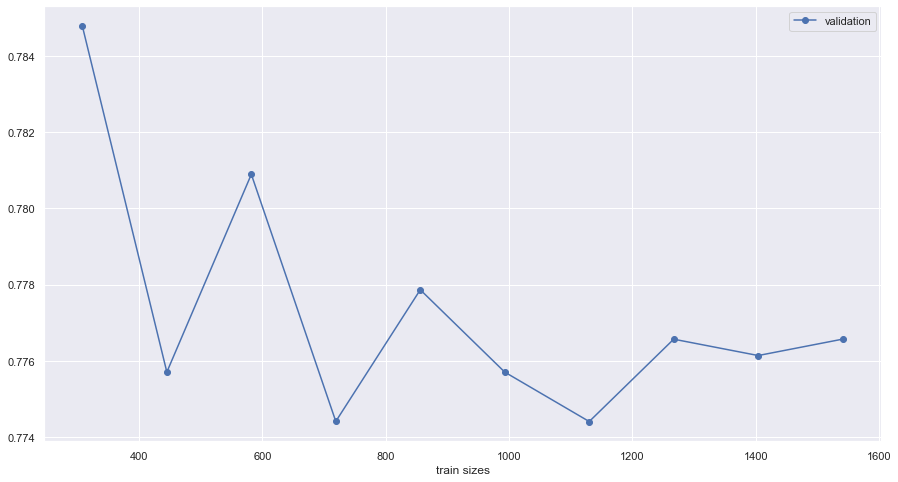

In [100]:
parameters={
            'weights':['uniform','distance'],
            'metric' : ['manhattan','euclidean','minkowski'],
            'leaf_size': [1], 
            'n_neighbors': list(range(1,20)), 
            'p': [1, 2]
           }
grid=bestPara(parameters,KNeighborsClassifier(),X_train3,y_train)
acc_dict["KNeighborsClassifier"]=grid.best_score_*100

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Score :  79.21227081054296 %
Best estimator :  SVC(C=0.92)


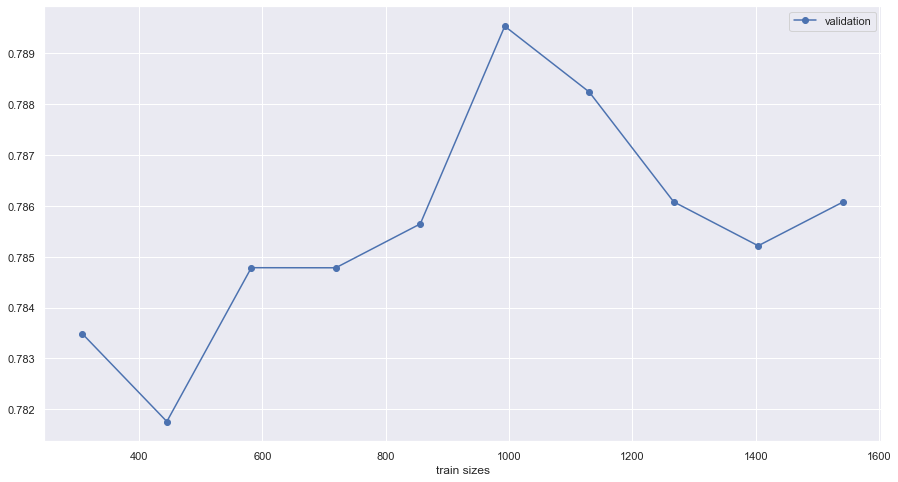

In [112]:
parameters = {
                'C': [0.92,0.918,0.922], 
                'gamma': [1,0.1,0.01,0.001],
                'kernel': ['rbf', 'poly', 'sigmoid'],
                'gamma':['scale','auto']
            }
grid=bestPara(parameters,SVC(),X_train,y_train)
acc_dict["SVC"]=grid.best_score_*100

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Score :  78.26213383448804 %
Best estimator :  RandomForestClassifier(max_depth=65, max_features=3, min_samples_split=6,
                       n_estimators=20)


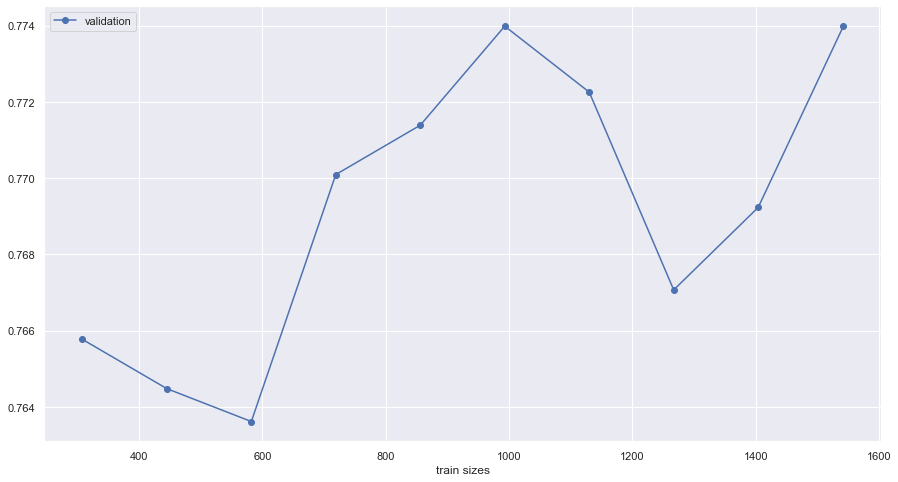

In [102]:
parameters={
            'n_estimators': [10,15,20, 25], 
            'max_features': [3,4,5,6], 
            'max_depth': [60,65, None], 
            #'bootstrap': [True, False],
            #'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [4, 5, 6]
           }
grid=bestPara(parameters,RandomForestClassifier(),X_train,y_train)
acc_dict["RandomForestClassifier"]=grid.best_score_*100

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Score :  79.03901713836919 %
Best estimator :  LogisticRegression(C=100, solver='newton-cg')


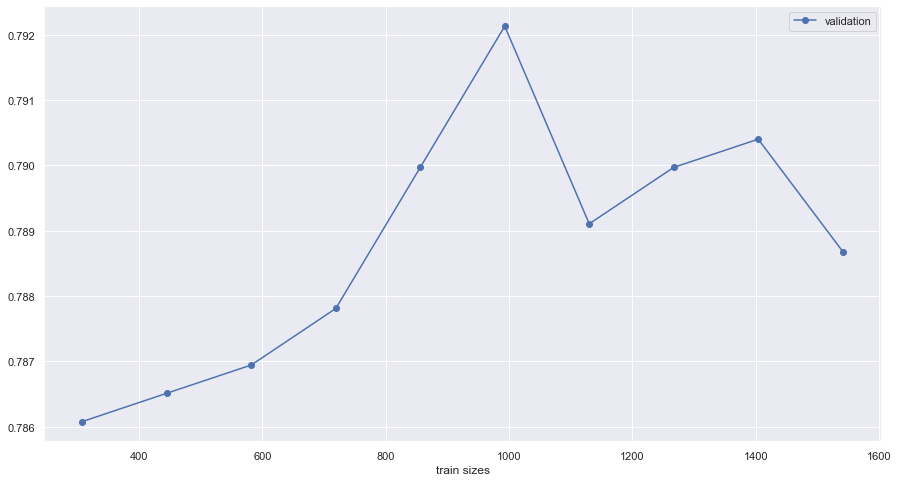

In [103]:

parameters={
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'penalty' : ['l2','l1', 'elasticnet', 'none'],
            'C' : [100, 10, 1.0,8],
            'class_weight':[None,'balanced'],
            #'fit_intercept':[True,False],
            #'multi_class':['auto', 'ovr', 'multinomial']
           }
grid=bestPara(parameters,LogisticRegression(),X_train2,y_train)
acc_dict["LogisticRegression"]=grid.best_score_*100

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Score :  79.428534028966 %
Best estimator :  GradientBoostingClassifier(max_depth=1, max_features='log2')


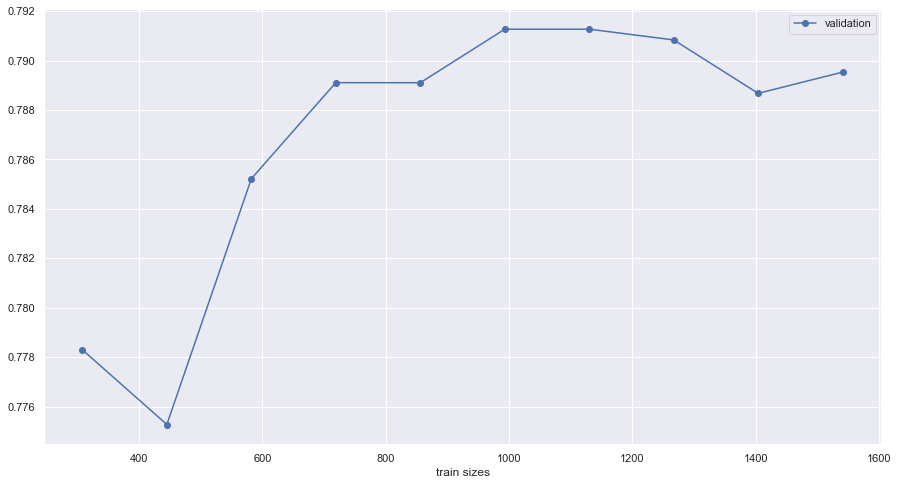

In [128]:
#GradientBoostingClassifier(n_estimators=100,random_state=SEED,verbose=1)
parameters={
            #'loss':['deviance','exponential'],
            #'criterion':['friedman_mse', 'squared_error', 'mse', 'mae'],
            'max_depth':[1,2],
            'max_features':['auto', 'sqrt', 'log2'],
            #'min_samples_leaf':[1,2,3]
}

grid=bestPara(parameters,GradientBoostingClassifier(),X_train2,y_train)
acc_dict["GradientBoostingClassifier"]=grid.best_score_*100

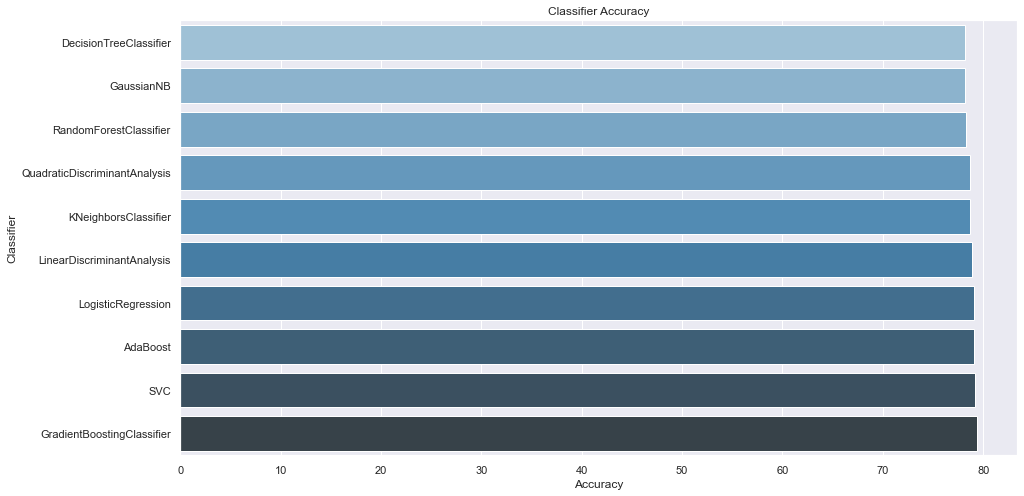

In [129]:
allModels(acc_dict)

Accuracy Score: 0.75126
F1 score: 0.74996
Recall: 0.75126
Precision: 0.74997


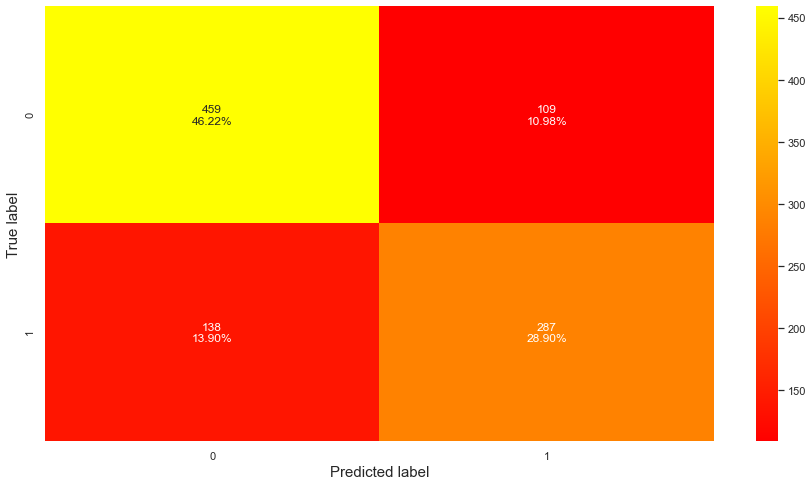

In [130]:
resultsClassification(GradientBoostingClassifier(max_depth=1, max_features='log2')
                      ,X_train2,y_train,X_test2,y_test)